In [1]:
# !pip install scikit-learn-extra
# !pip install statsmodels

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

from sklearn.preprocessing import *

In [3]:
import os

# 운영체제별 한글 폰트 설정
if os.name == 'posix': # Mac 환경 폰트 설정
    plt.rc('font', family='AppleGothic')
elif os.name == 'nt': # Windows 환경 폰트 설정
    plt.rc('font', family='Malgun Gothic')

plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정


# 글씨 선명하게 출력하는 설정
%config InlineBackend.figure_format = 'retina'

In [4]:
df = pd.read_excel('../data/전통시장데이터_정리완료_좌표변환.xlsx')
df.head(1)

,시장명,위도,경도,시도명,시군구명,5일장,복합장,상설장,점포수,공중화장실보유여부,...,농산물이 주요품목,시구 미성년자,시구 젊은청년,시구 소득인구,시구 노년인구,동별 미성년자,동별 젊은청년,동별 소득인구,동별 노년인구,버스정류장
0,양촌시장,1.793208e+06,976286.760773,충청남도,논산시,1,0,0,0,1,...,0,17038,16330,52212,31095,791,726,2528,2172,10


## 데이터 전처리

### Column 정리

In [5]:
# 주변시설이 없는 시장 Data Drop
nearby_facilities = ['대형마트', '주차장', '지하철역', '학교','편의점', '주유소,충전소', '문화시설', '관광명소', '음식점', '카페']
df['주변시설']=0
for i in range(len(df)):
    df['주변시설'][i]=df.loc[i, nearby_facilities].sum()

<ipython-input-5-fedd1eabff23>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['주변시설'][i]=df.loc[i, nearby_facilities].sum()


In [6]:
df=df.drop(df[df['주변시설']==0].index)
df.reset_index(drop = True, inplace = True)

In [7]:
# 불필요 Column Drop
drop_columns = ['시장명', '위도', '경도', '시도명', '시군구명','주변시설']
df.drop(drop_columns, axis=1, inplace = True)

<AxesSubplot:xlabel='지하철역', ylabel='Density'>

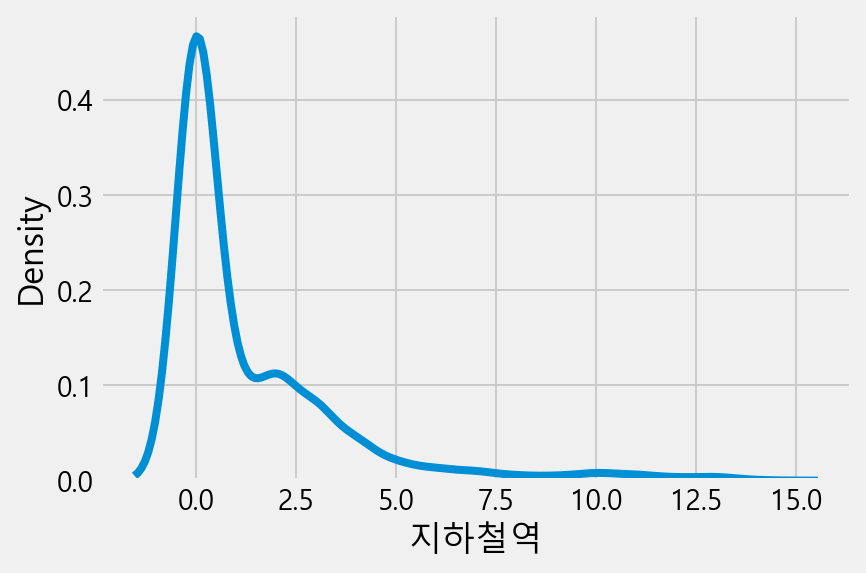

In [8]:
# 대중교통 = 지하철역 + 버스정류장
# 지하철역, 버스정류장의 왜도, 첨도를 고려하여 합쳐주도록 한다.

# 지하철역
sns.kdeplot(df.loc[:,'지하철역'])

<AxesSubplot:xlabel='버스정류장', ylabel='Density'>

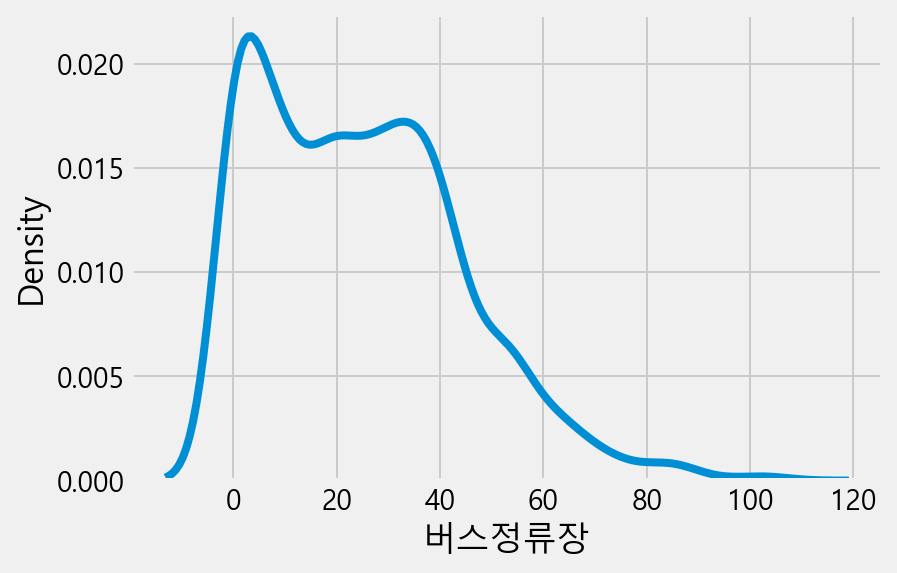

In [9]:
# 버스정류장
sns.kdeplot(df.loc[:,'버스정류장'])

<AxesSubplot:ylabel='Density'>

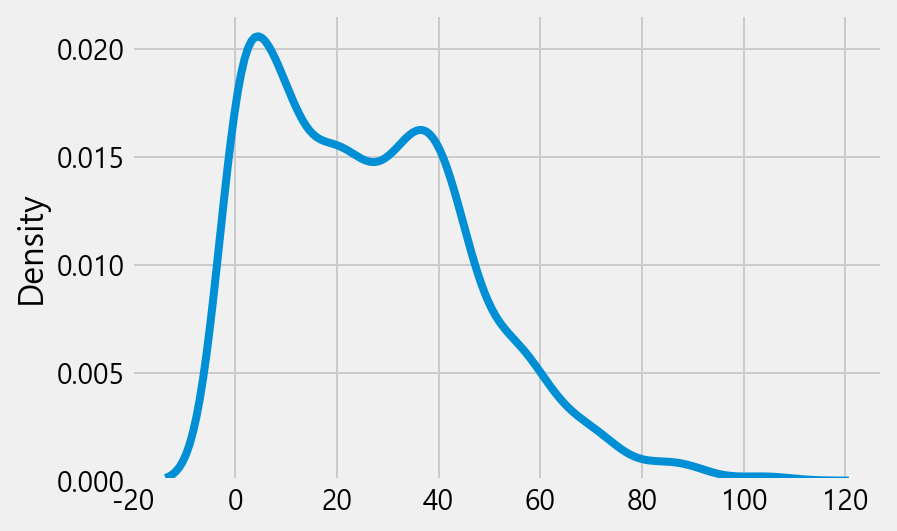

In [10]:
# 대중교통 = 지하철역 + 버스정류장
sns.kdeplot(df.loc[:,'지하철역']+df.loc[:,'버스정류장'])

In [11]:
df['대중교통']=df.loc[:,'지하철역']+df.loc[:,'버스정류장']
df.drop(['지하철역','버스정류장'],axis=1,inplace=True)

### 이상치 제거

#### 운영기간

<AxesSubplot:>

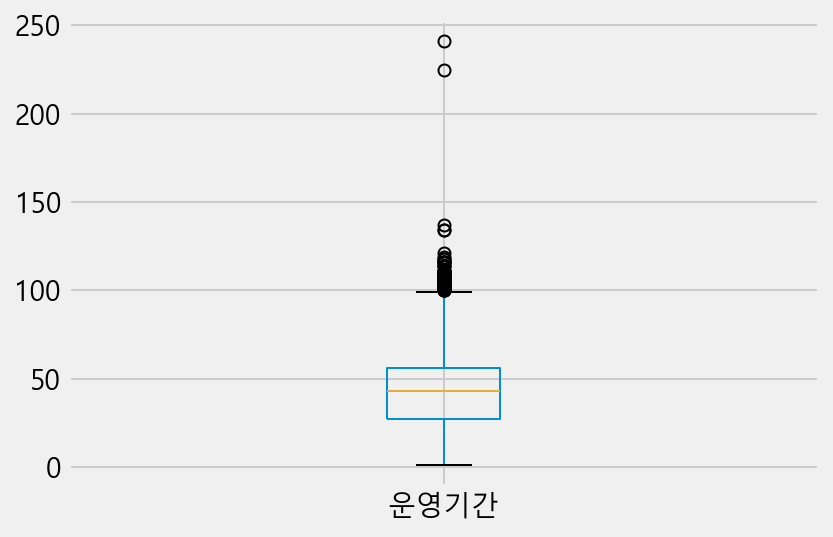

In [12]:
df.boxplot(column = '운영기간')

<AxesSubplot:>

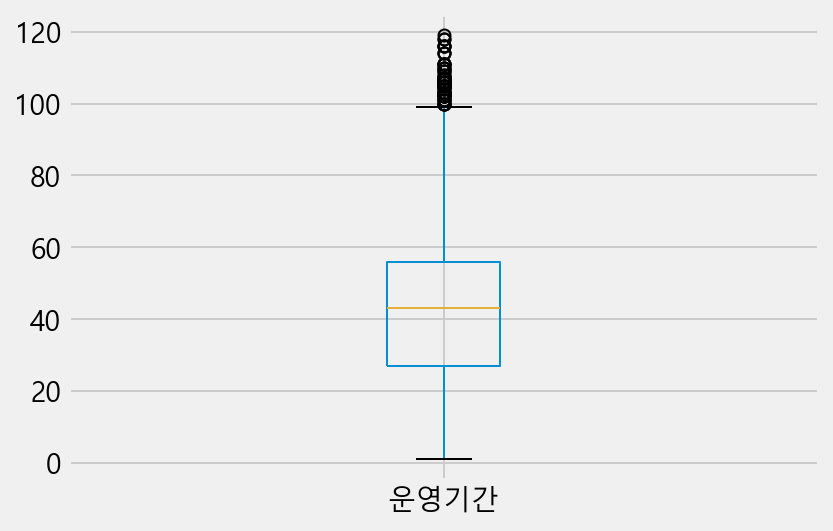

In [13]:
df = df[df['운영기간'] <= 120]
df.boxplot(column = '운영기간')

#### 대형마트

<AxesSubplot:>

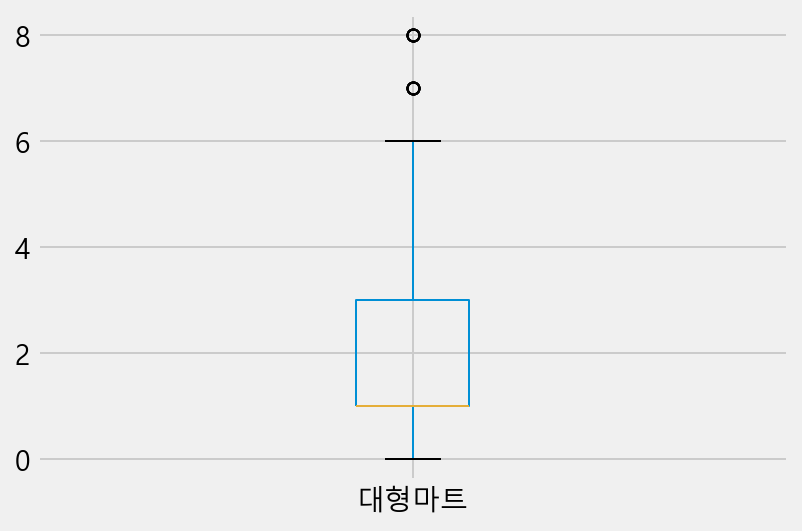

In [14]:
df.boxplot(column = '대형마트')

In [15]:
print('대형마트가 7개인 경우 : ', len(df[df['대형마트'] == 7]))
print('대형마트가 8개인 경우 : ', len(df[df['대형마트'] == 8]))

대형마트가 7개인 경우 :  5
대형마트가 8개인 경우 :  5


<AxesSubplot:>

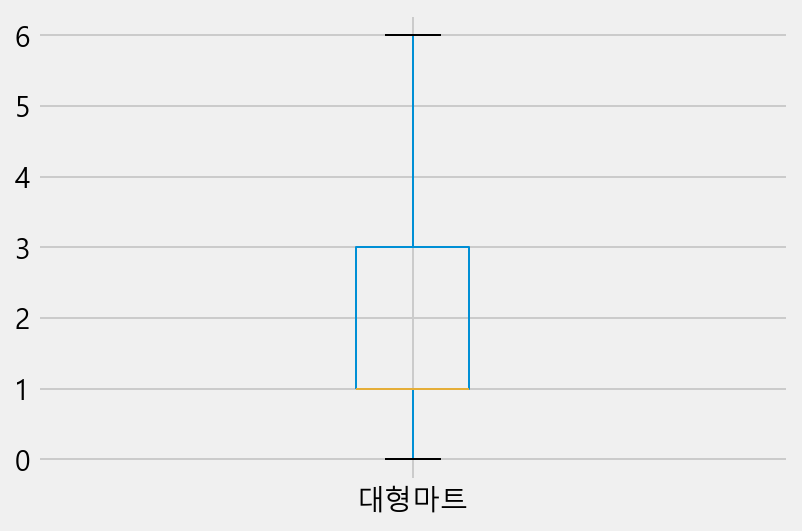

In [16]:
df = df[df['대형마트'] < 7]
df.boxplot(column = '대형마트')

#### 주차장

<AxesSubplot:>

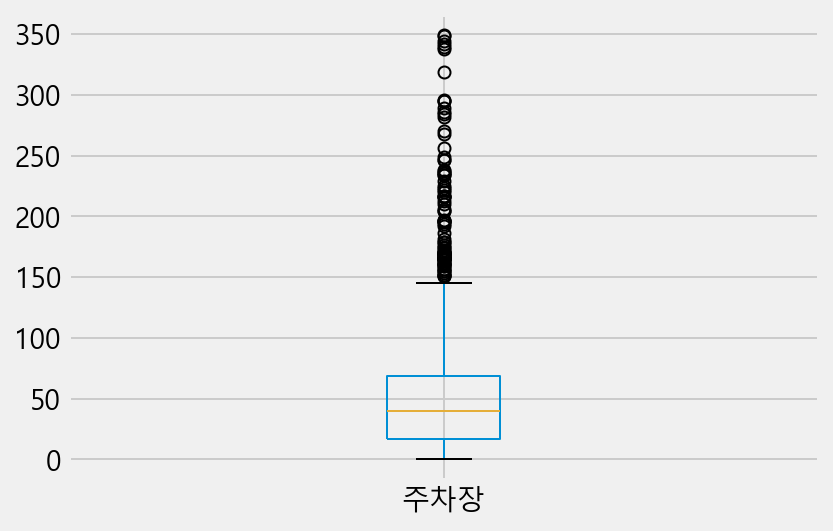

In [17]:
df.boxplot(column = '주차장')

<AxesSubplot:>

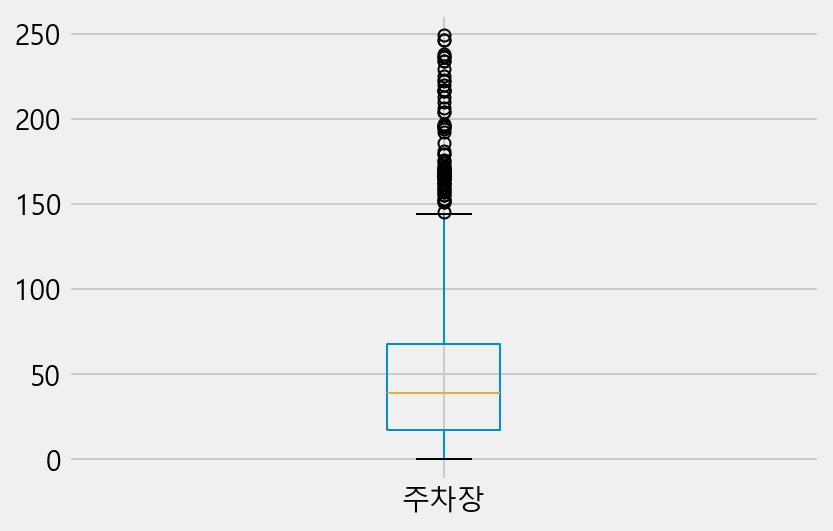

In [18]:
df = df[df['주차장'] < 250]
df.boxplot(column = '주차장')

#### 학교

<AxesSubplot:>

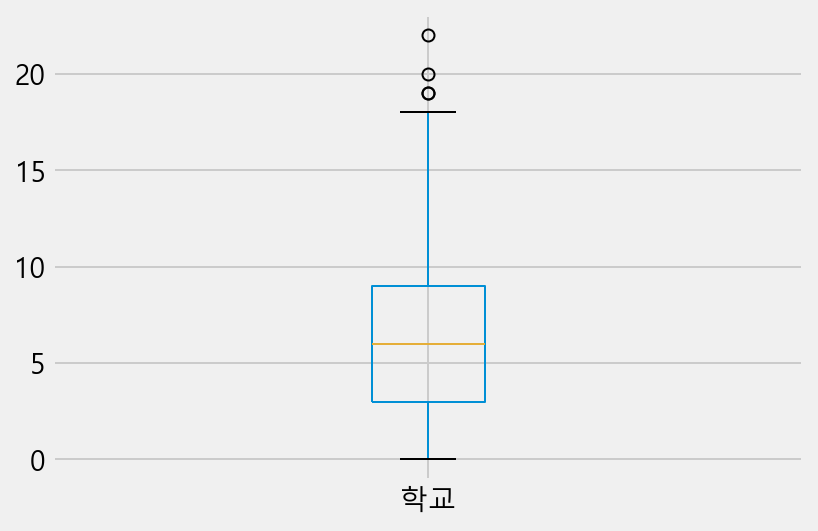

In [19]:
df.boxplot(column = '학교')

<AxesSubplot:>

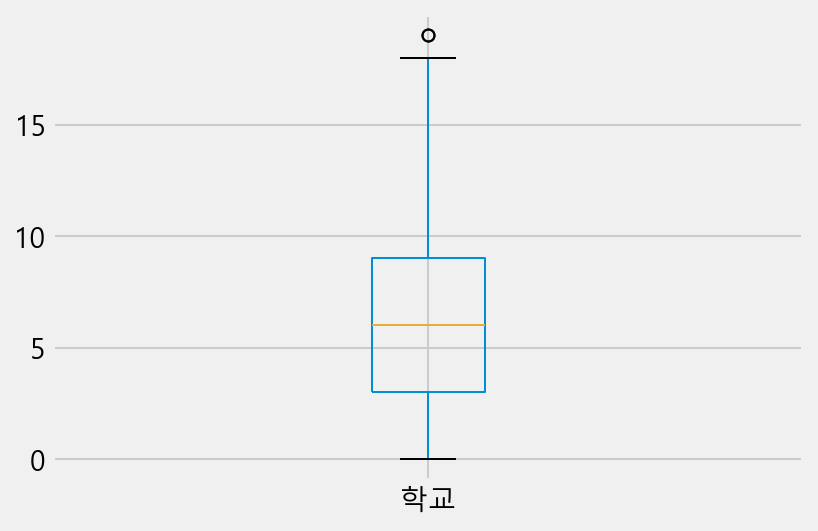

In [20]:
df = df[df['학교'] < 20]
df.boxplot(column = '학교')

#### 편의점

<AxesSubplot:>

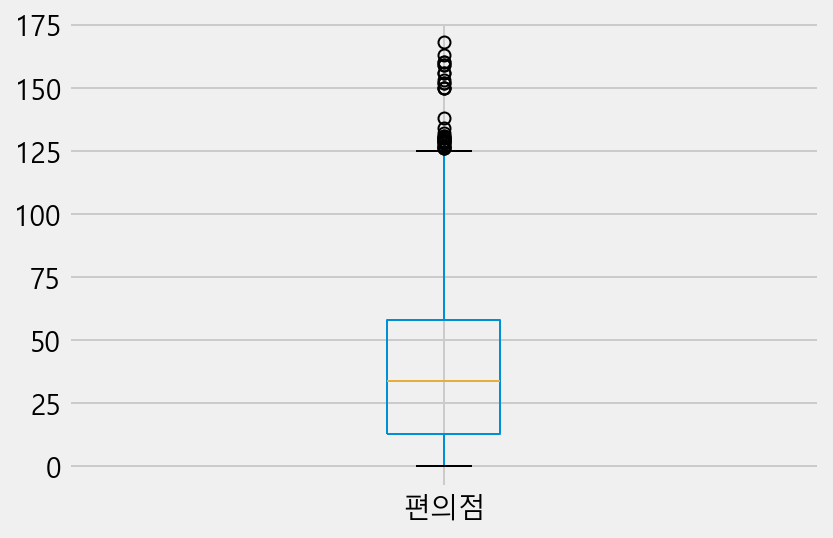

In [21]:
df.boxplot(column = '편의점')

<AxesSubplot:>

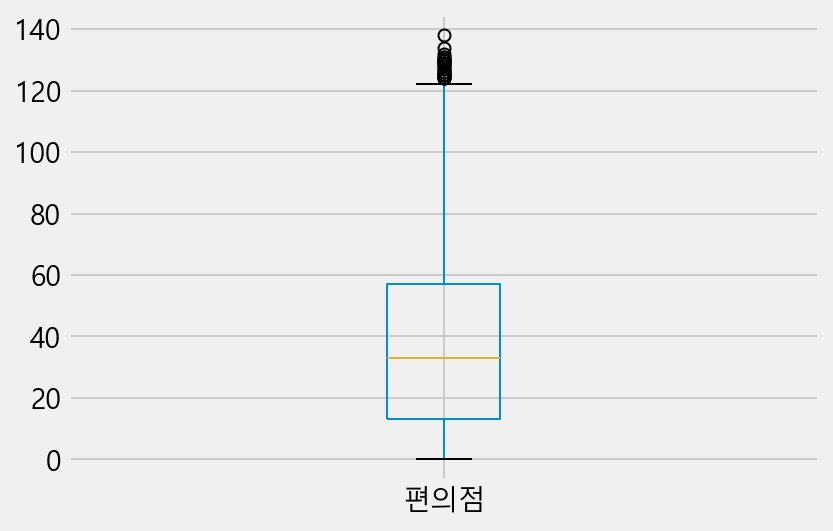

In [22]:
df = df[df['편의점'] < 140]
df.boxplot(column = '편의점')

#### 주유소,충전소

<AxesSubplot:>

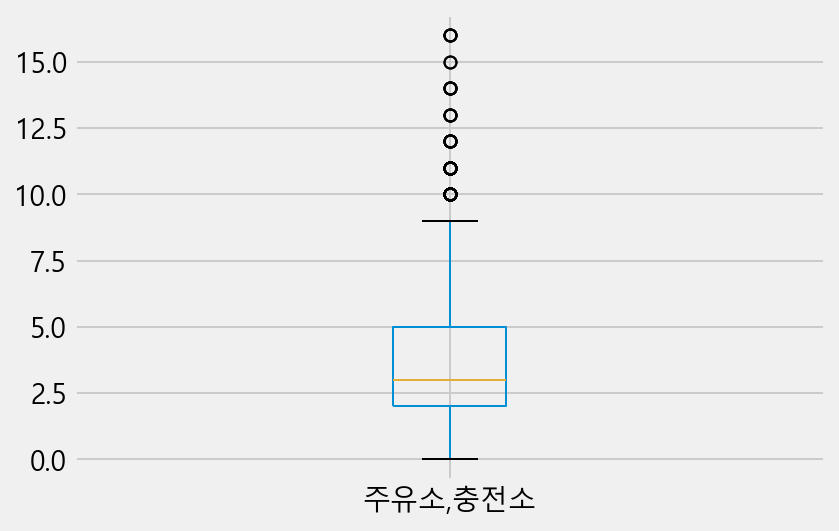

In [23]:
df.boxplot(column = '주유소,충전소')

<AxesSubplot:>

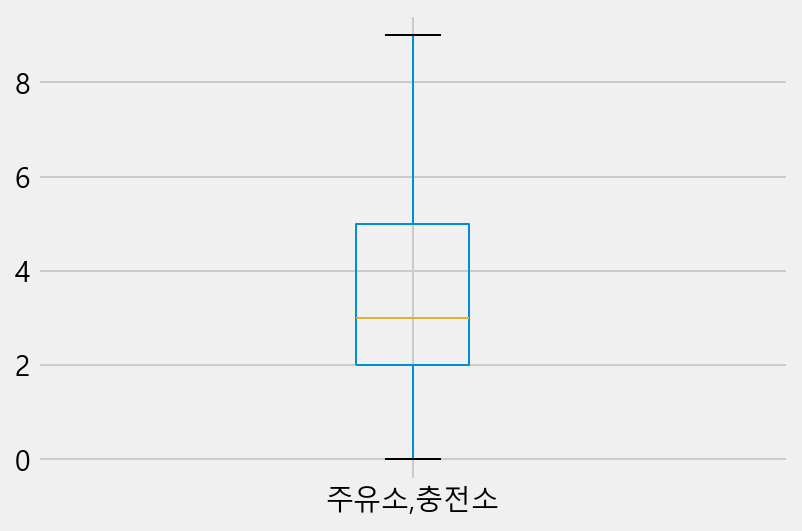

In [24]:
df = df[df['주유소,충전소'] < 10]
df.boxplot(column = '주유소,충전소')

#### 문화시설

<AxesSubplot:>

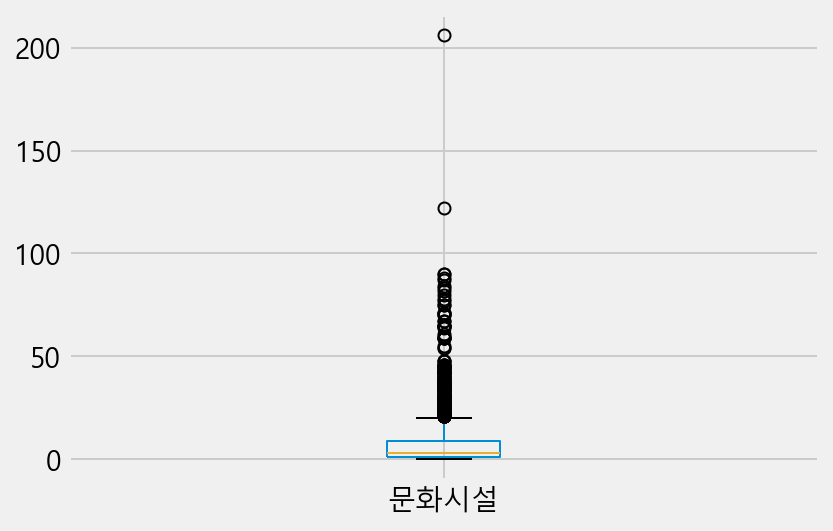

In [25]:
df.boxplot(column = '문화시설')

<AxesSubplot:>

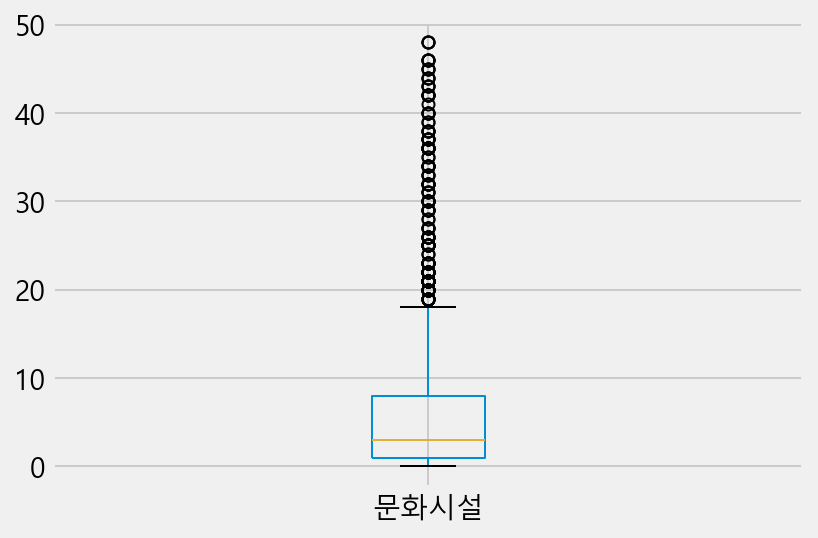

In [26]:
df = df[df['문화시설'] <= 50]
df.boxplot(column = '문화시설')

#### 관광명소

<AxesSubplot:>

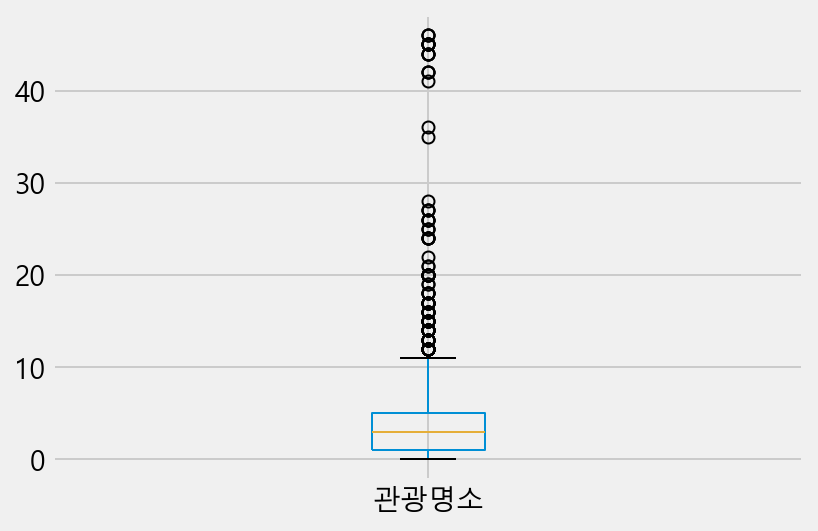

In [27]:
df.boxplot(column = '관광명소')

<AxesSubplot:>

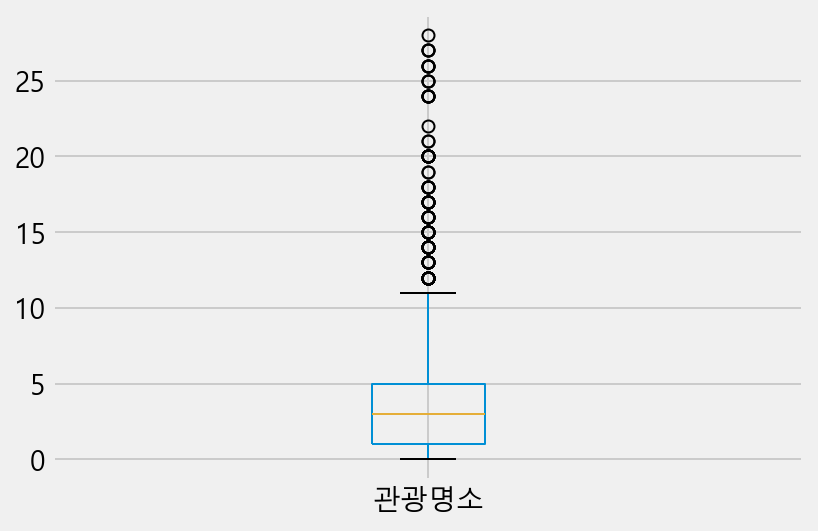

In [28]:
df = df[df['관광명소'] <= 30]
df.boxplot(column = '관광명소')

#### 대중교통

<AxesSubplot:>

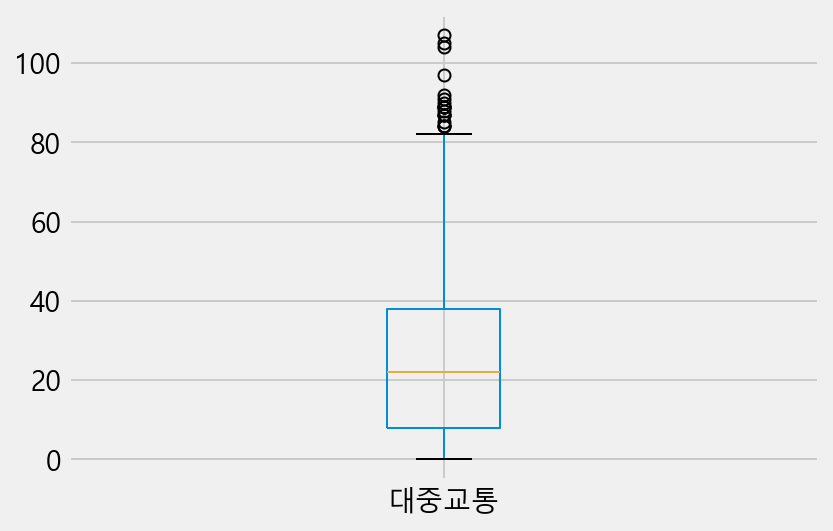

In [29]:
df.boxplot(column = '대중교통')

<AxesSubplot:>

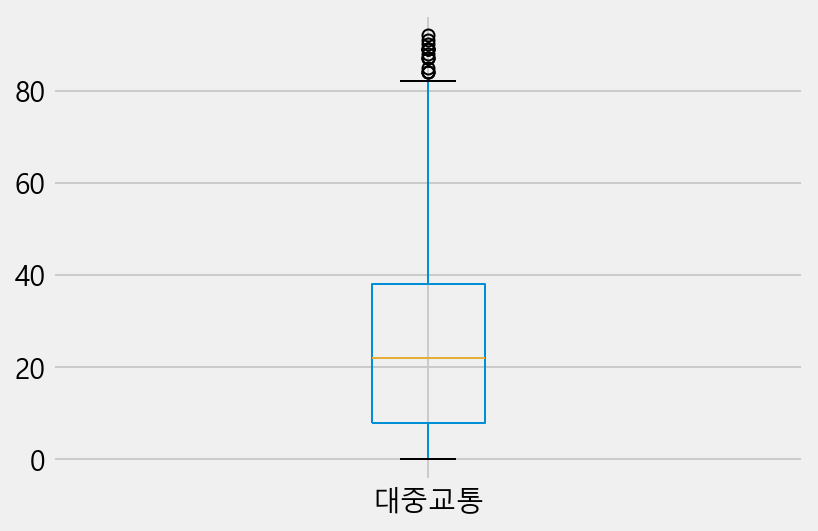

In [30]:
df = df[df['대중교통'] <= 95]
df.boxplot(column = '대중교통')

#### 음식점

<AxesSubplot:>

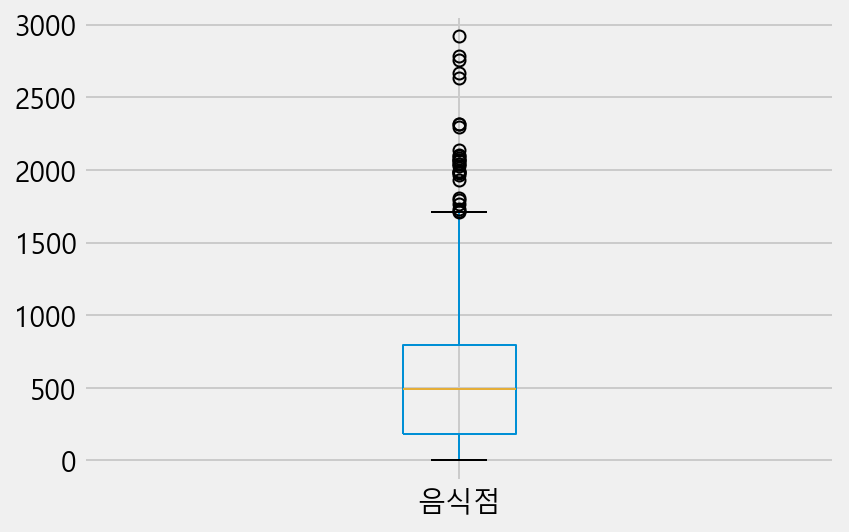

In [31]:
df.boxplot(column = '음식점')


<AxesSubplot:>

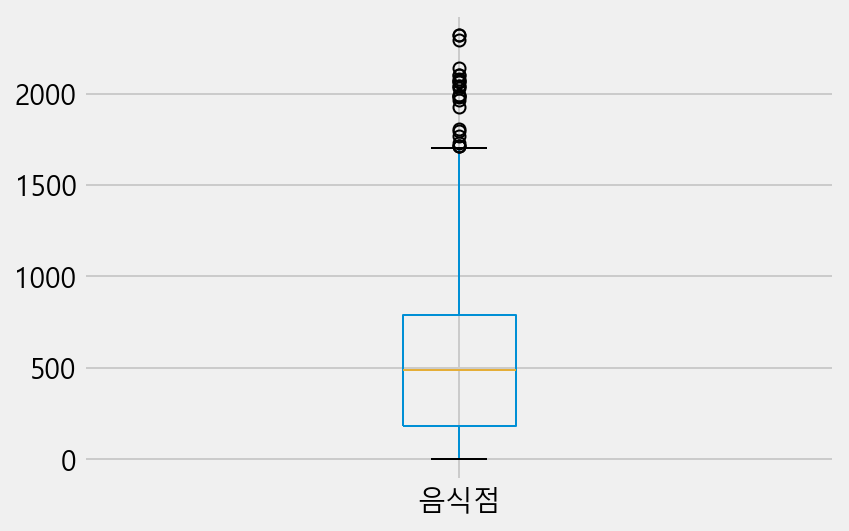

In [32]:
df = df[df['음식점'] <= 2500]
df.boxplot(column = '음식점')

#### 카페

<AxesSubplot:>

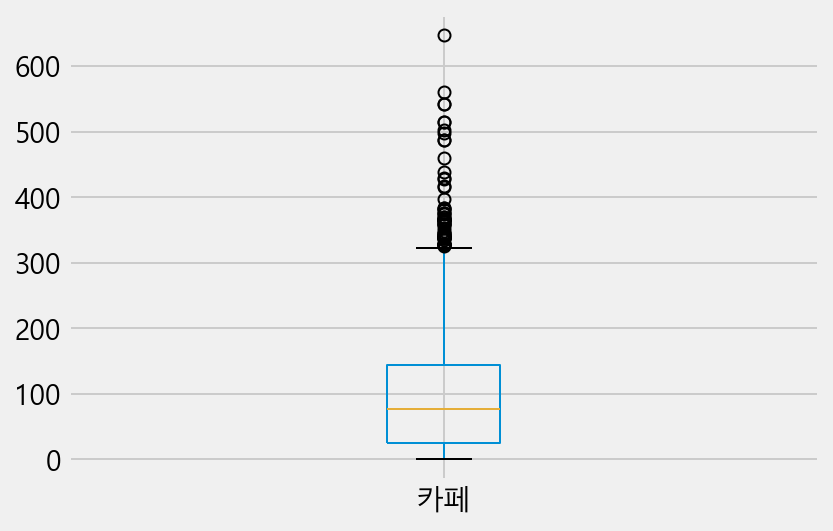

In [33]:
df.boxplot(column = '카페')

<AxesSubplot:>

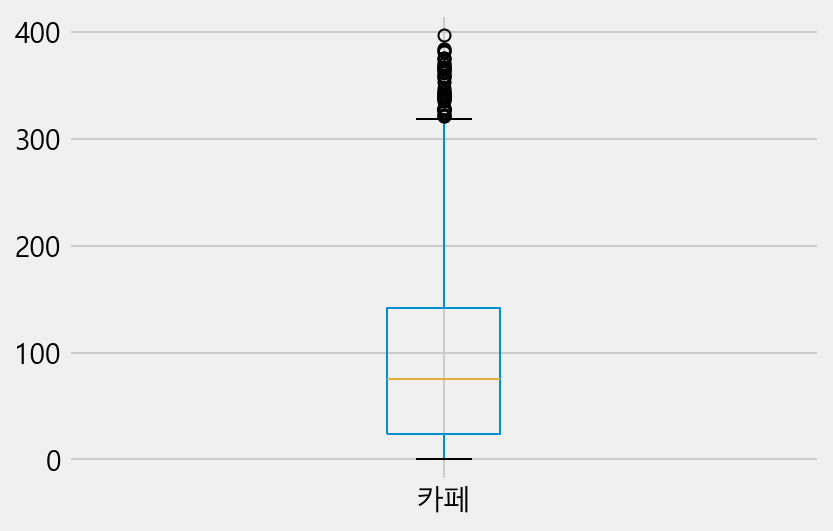

In [34]:
df = df[df['카페'] <= 400]
df.boxplot(column = '카페')

#### 공시지가

<AxesSubplot:>

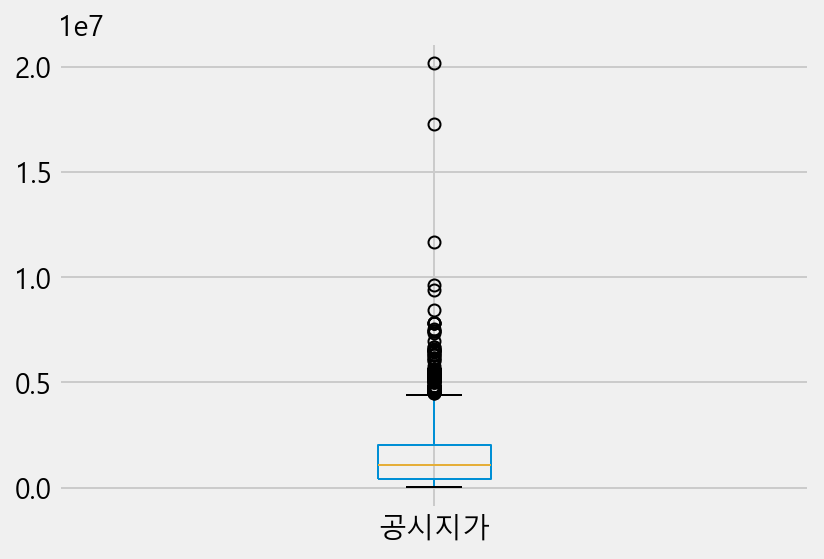

In [35]:
df.boxplot(column = '공시지가')

<AxesSubplot:>

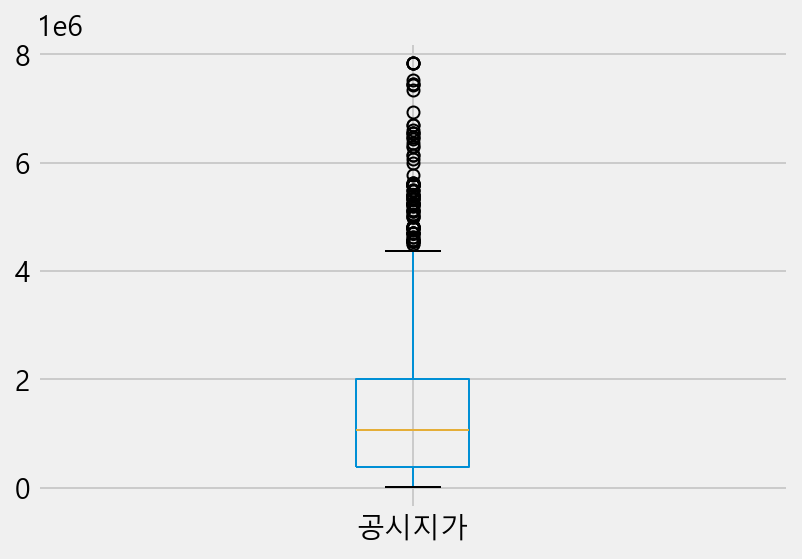

In [36]:
df = df[df['공시지가'] <= 8000000]
df.boxplot(column = '공시지가')

#### 행정동 인구

<AxesSubplot:>

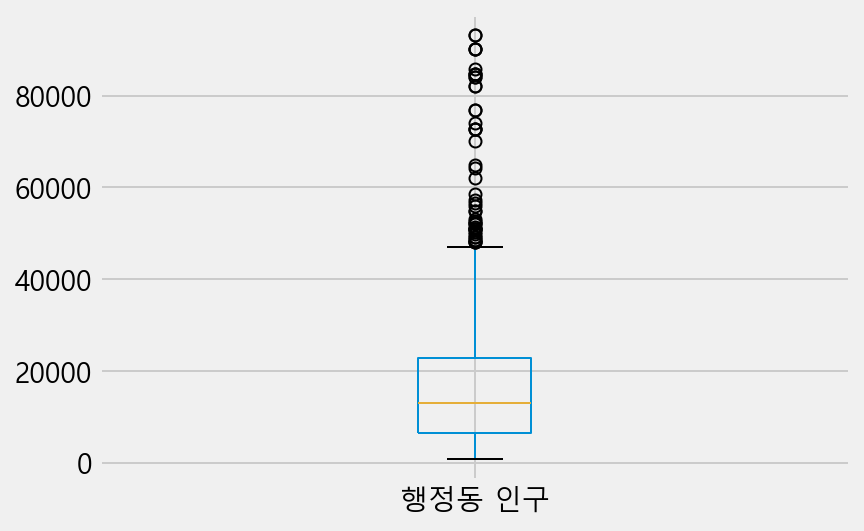

In [37]:
df.boxplot(column = '행정동 인구')

<AxesSubplot:>

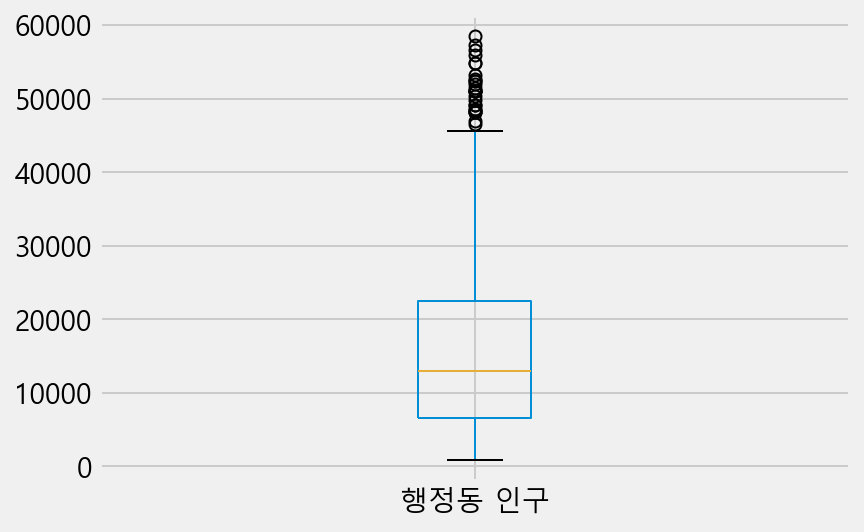

In [38]:
df = df[df['행정동 인구'] <= 60000]
df.boxplot(column = '행정동 인구')

#### 행정시구 인구

<AxesSubplot:>

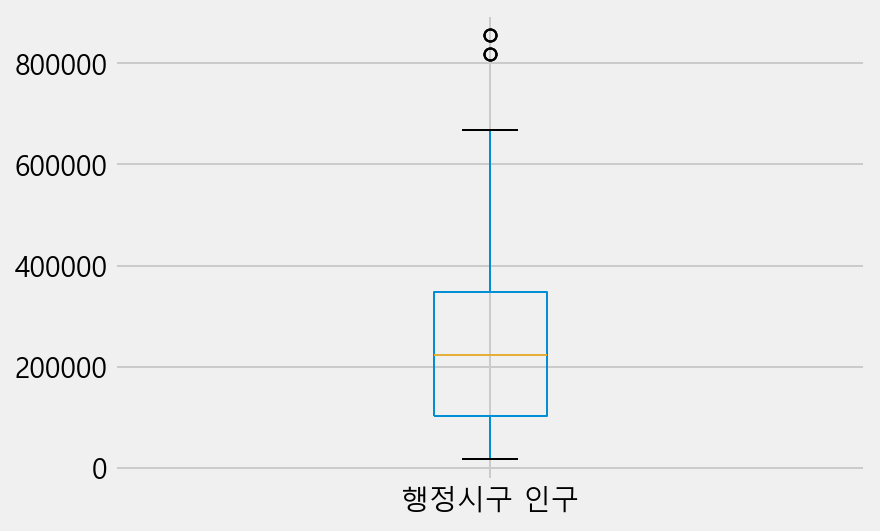

In [39]:
df.boxplot(column = '행정시구 인구')

<AxesSubplot:>

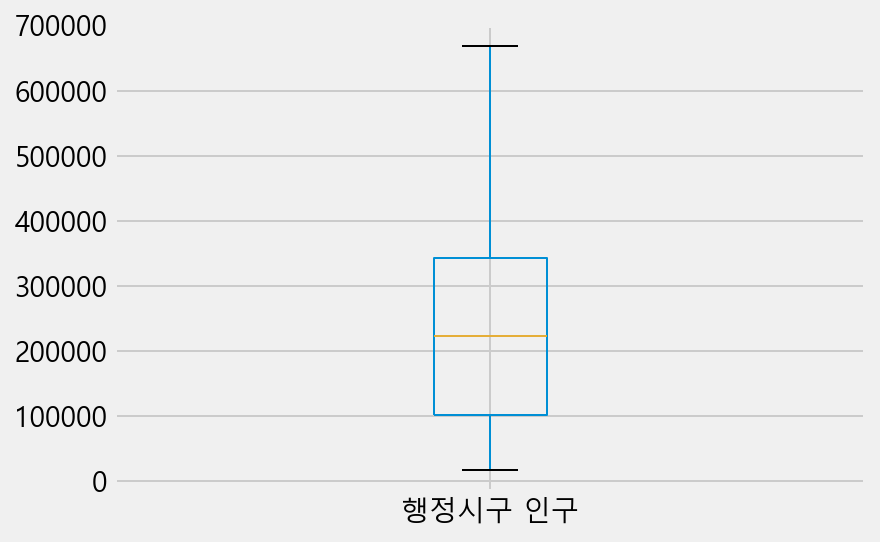

In [40]:
df = df[df['행정시구 인구'] <= 800000]
df.boxplot(column = '행정시구 인구')

#### 시도별 소득월액

<AxesSubplot:>

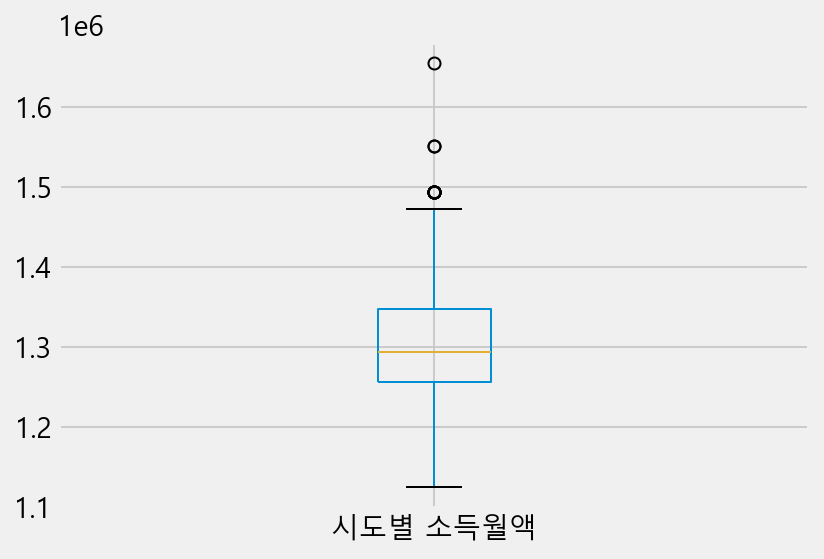

In [41]:
df.boxplot(column = '시도별 소득월액')

<AxesSubplot:>

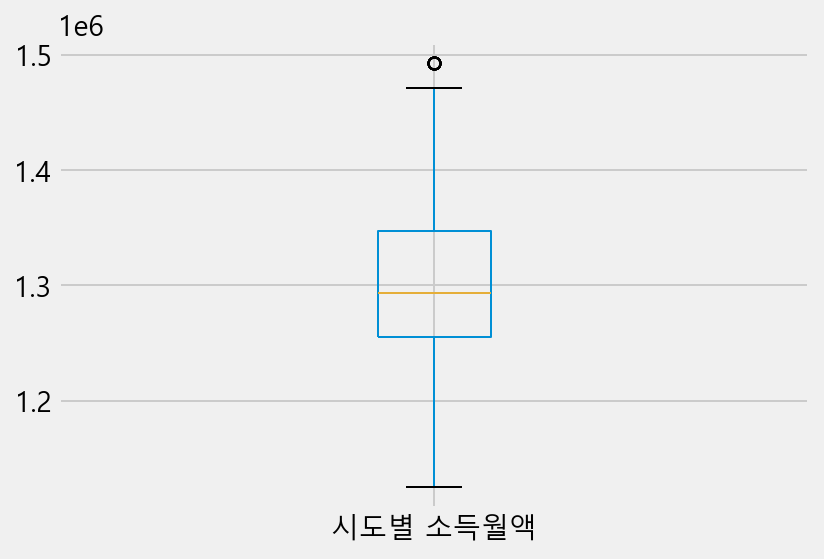

In [42]:
df = df[df['시도별 소득월액'] <= 1500000]
df.boxplot(column = '시도별 소득월액')

#### 시구 미성년자

<AxesSubplot:>

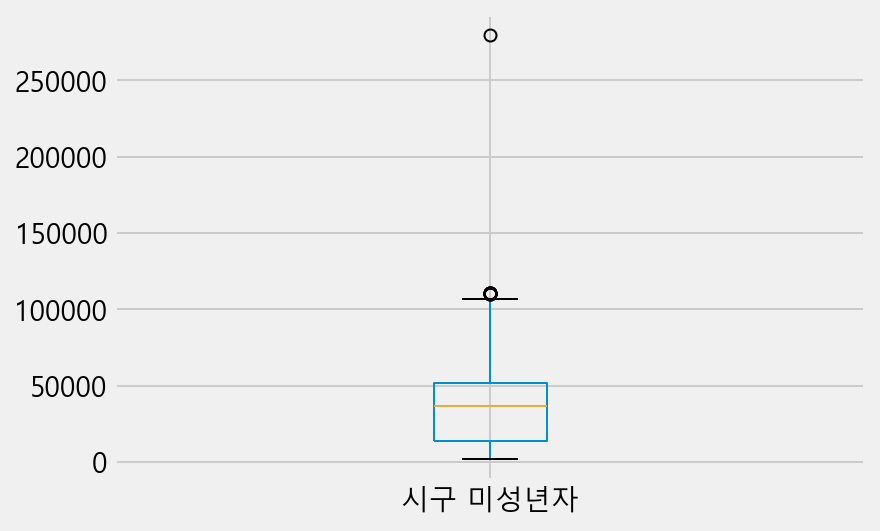

In [43]:
df.boxplot(column = '시구 미성년자')

<AxesSubplot:>

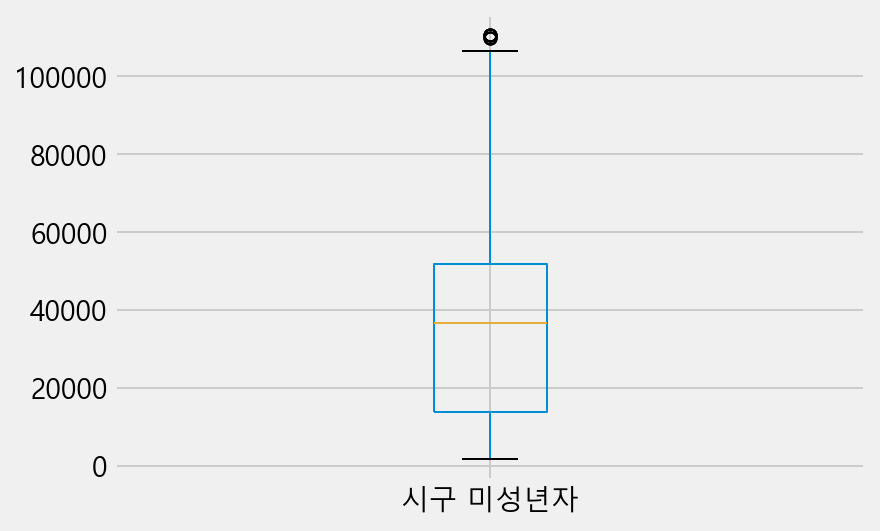

In [44]:
df = df[df['시구 미성년자'] <= 150000]
df.boxplot(column = '시구 미성년자')

#### 시구 젊은청년

<AxesSubplot:>

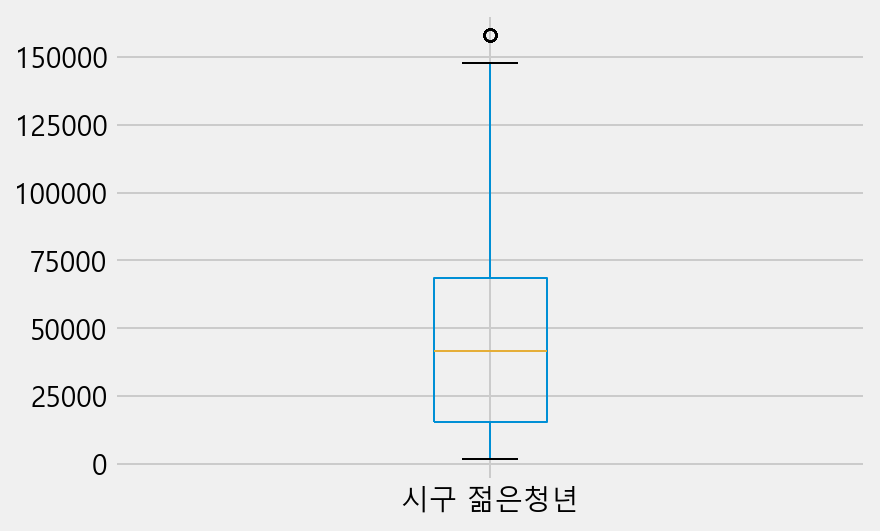

In [45]:
df.boxplot(column = '시구 젊은청년')

<AxesSubplot:>

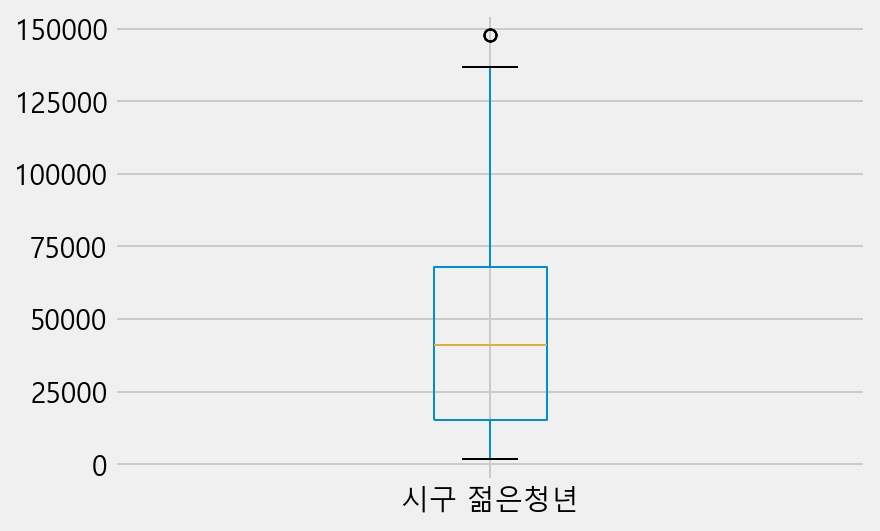

In [46]:
df = df[df['시구 젊은청년'] <= 150000]
df.boxplot(column = '시구 젊은청년')

#### 시구 소득인구

<AxesSubplot:>

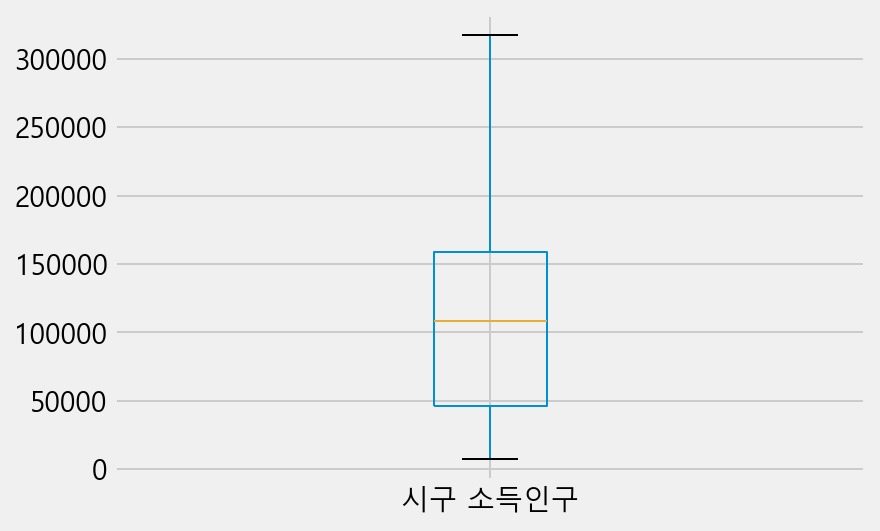

In [47]:
df.boxplot(column = '시구 소득인구')

#### 시구 노년인구

<AxesSubplot:>

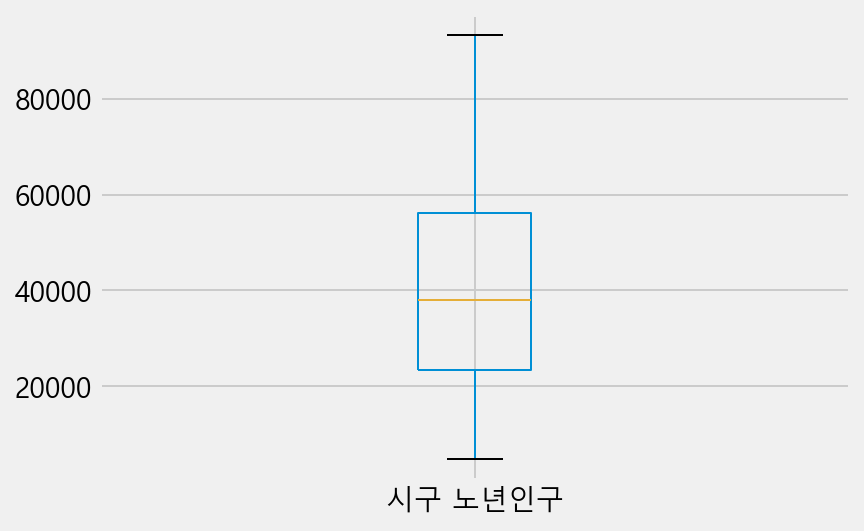

In [48]:
df.boxplot(column = '시구 노년인구')

#### 동별 미성년자

<AxesSubplot:>

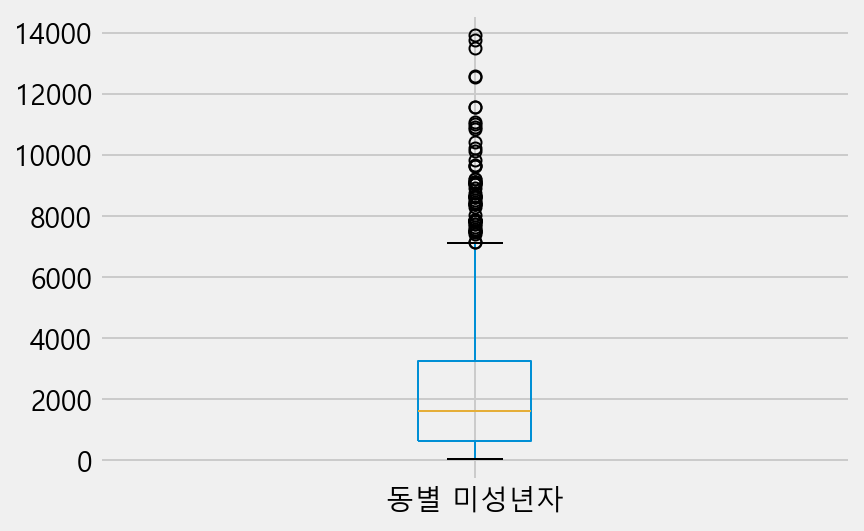

In [49]:
df.boxplot(column = '동별 미성년자')

<AxesSubplot:>

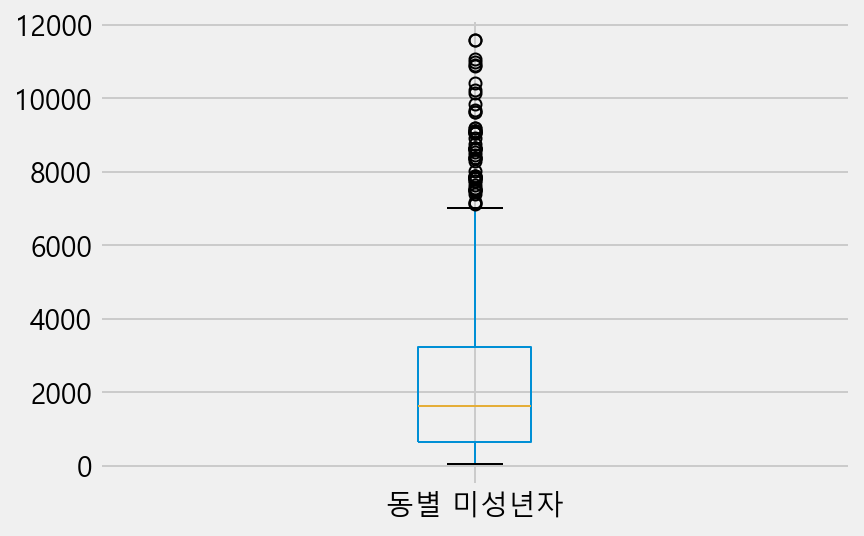

In [50]:
df = df[df['동별 미성년자'] <= 12000]
df.boxplot(column = '동별 미성년자')

#### 동별 젊은청년

<AxesSubplot:>

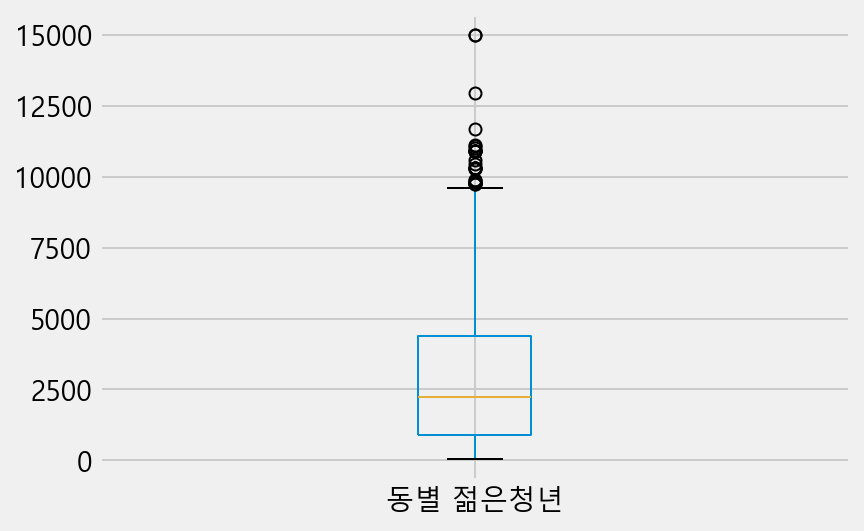

In [51]:
df.boxplot(column = '동별 젊은청년')

<AxesSubplot:>

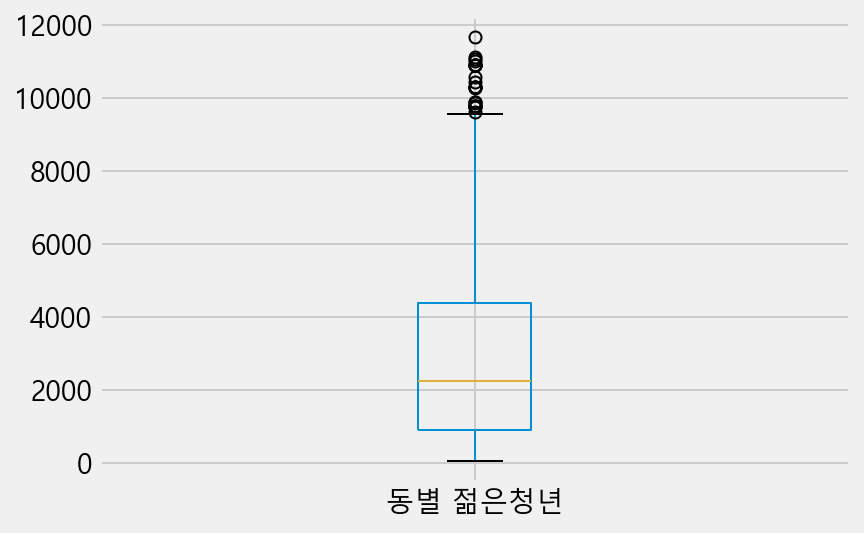

In [52]:
df = df[df['동별 젊은청년'] <= 12500]
df.boxplot(column = '동별 젊은청년')

#### 동별 소득인구

<AxesSubplot:>

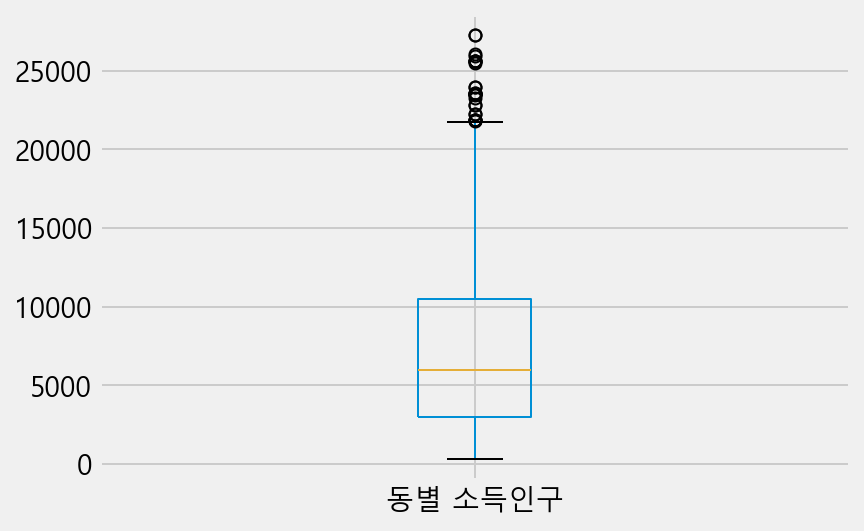

In [53]:
df.boxplot(column = '동별 소득인구')

<AxesSubplot:>

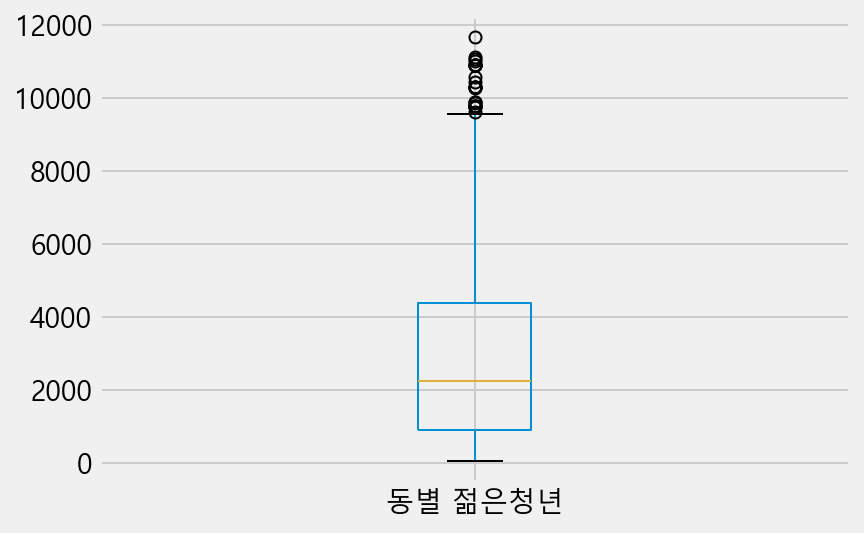

In [54]:
df = df[df['동별 젊은청년'] <= 25000]
df.boxplot(column = '동별 젊은청년')

#### 동별 노년인구

<AxesSubplot:>

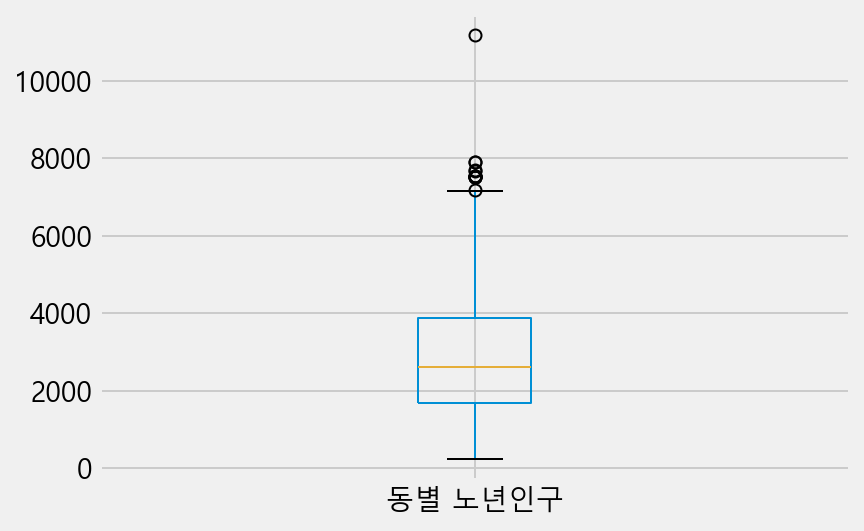

In [55]:
df.boxplot(column = '동별 노년인구')

<AxesSubplot:>

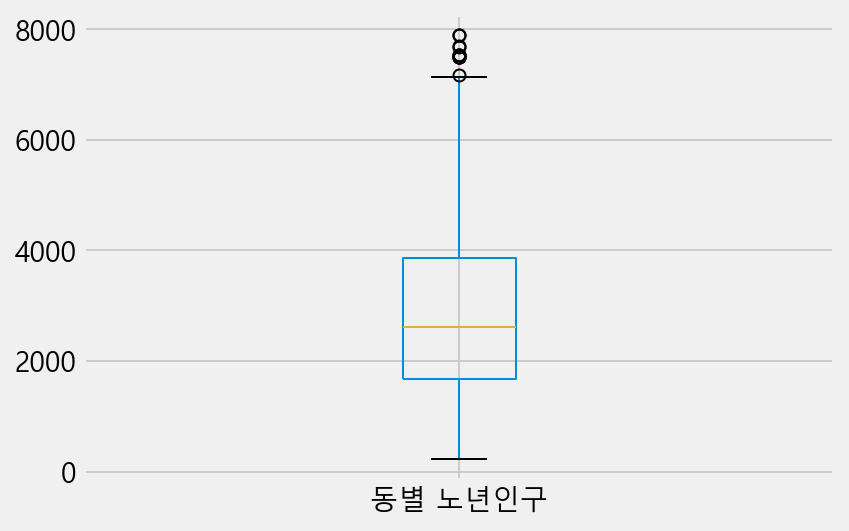

In [56]:
df = df[df['동별 노년인구'] <= 8000]
df.boxplot(column = '동별 노년인구')

#### 점포수

<AxesSubplot:>

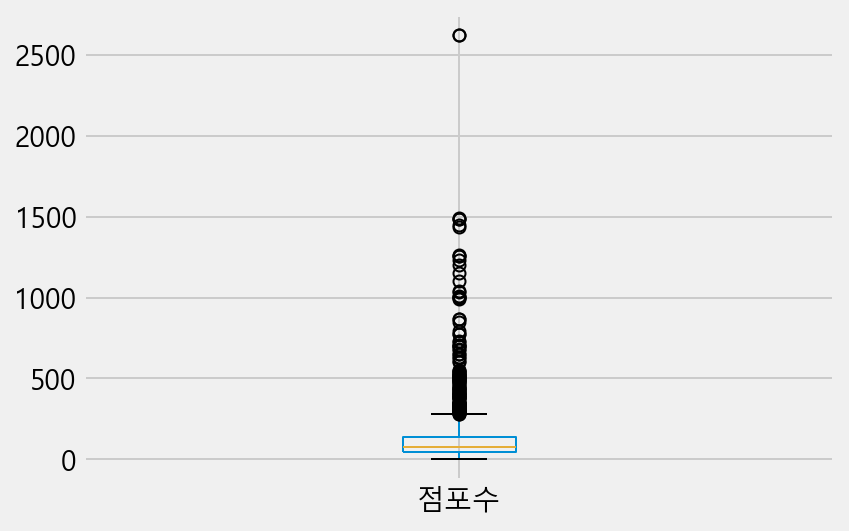

In [57]:
df.boxplot(column = '점포수')

<AxesSubplot:>

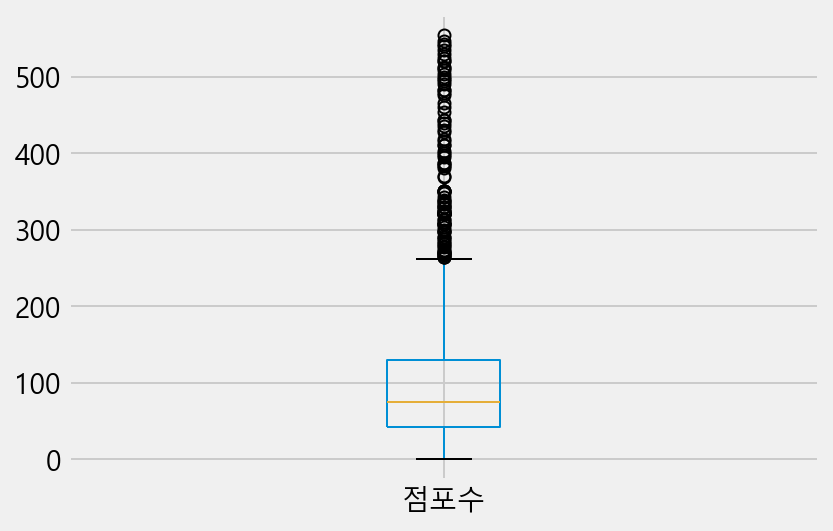

In [58]:
df = df[df['점포수'] <= 600]
df.boxplot(column = '점포수')

159


<AxesSubplot:>

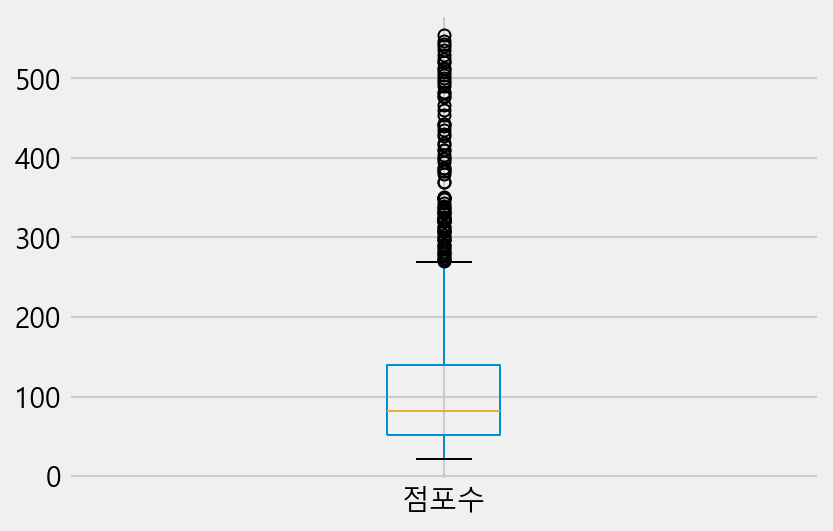

In [59]:
print(len(df[df['점포수'] <= 20])) # 점포수가 사분위수 기준 20개 이하일 경우 삭제한다.
df = df[df['점포수'] > 20]
df.boxplot(column = '점포수')

#### 데이터 저장

In [66]:
# row drop으로 인한 index reset
df.reset_index(drop = True, inplace = True)
df.to_excel('../data/preprocess_data.xlsx')

### 변수 분포 확인
- 분포의 왜도, 첨도 모두 높으므로 후처리가 필요로 함을 알 수 있다.
- 연속형 변수의 경우, StandardScaler와 logScale을 활용하여 정규화를 진행한다.

In [61]:
def histplot(data, row_num, col_num) :
    fig, ax = plt.subplots(ncols = col_num, figsize = (18,4))
    rep = int(len(data.columns) / col_num)
    
    for i in range(col_num) :
        sns.kdeplot(data.iloc[:, row_num + (rep * i)], ax = ax[i])
        ax[i].set_title(data.iloc[:, row_num + (rep * i)].name)

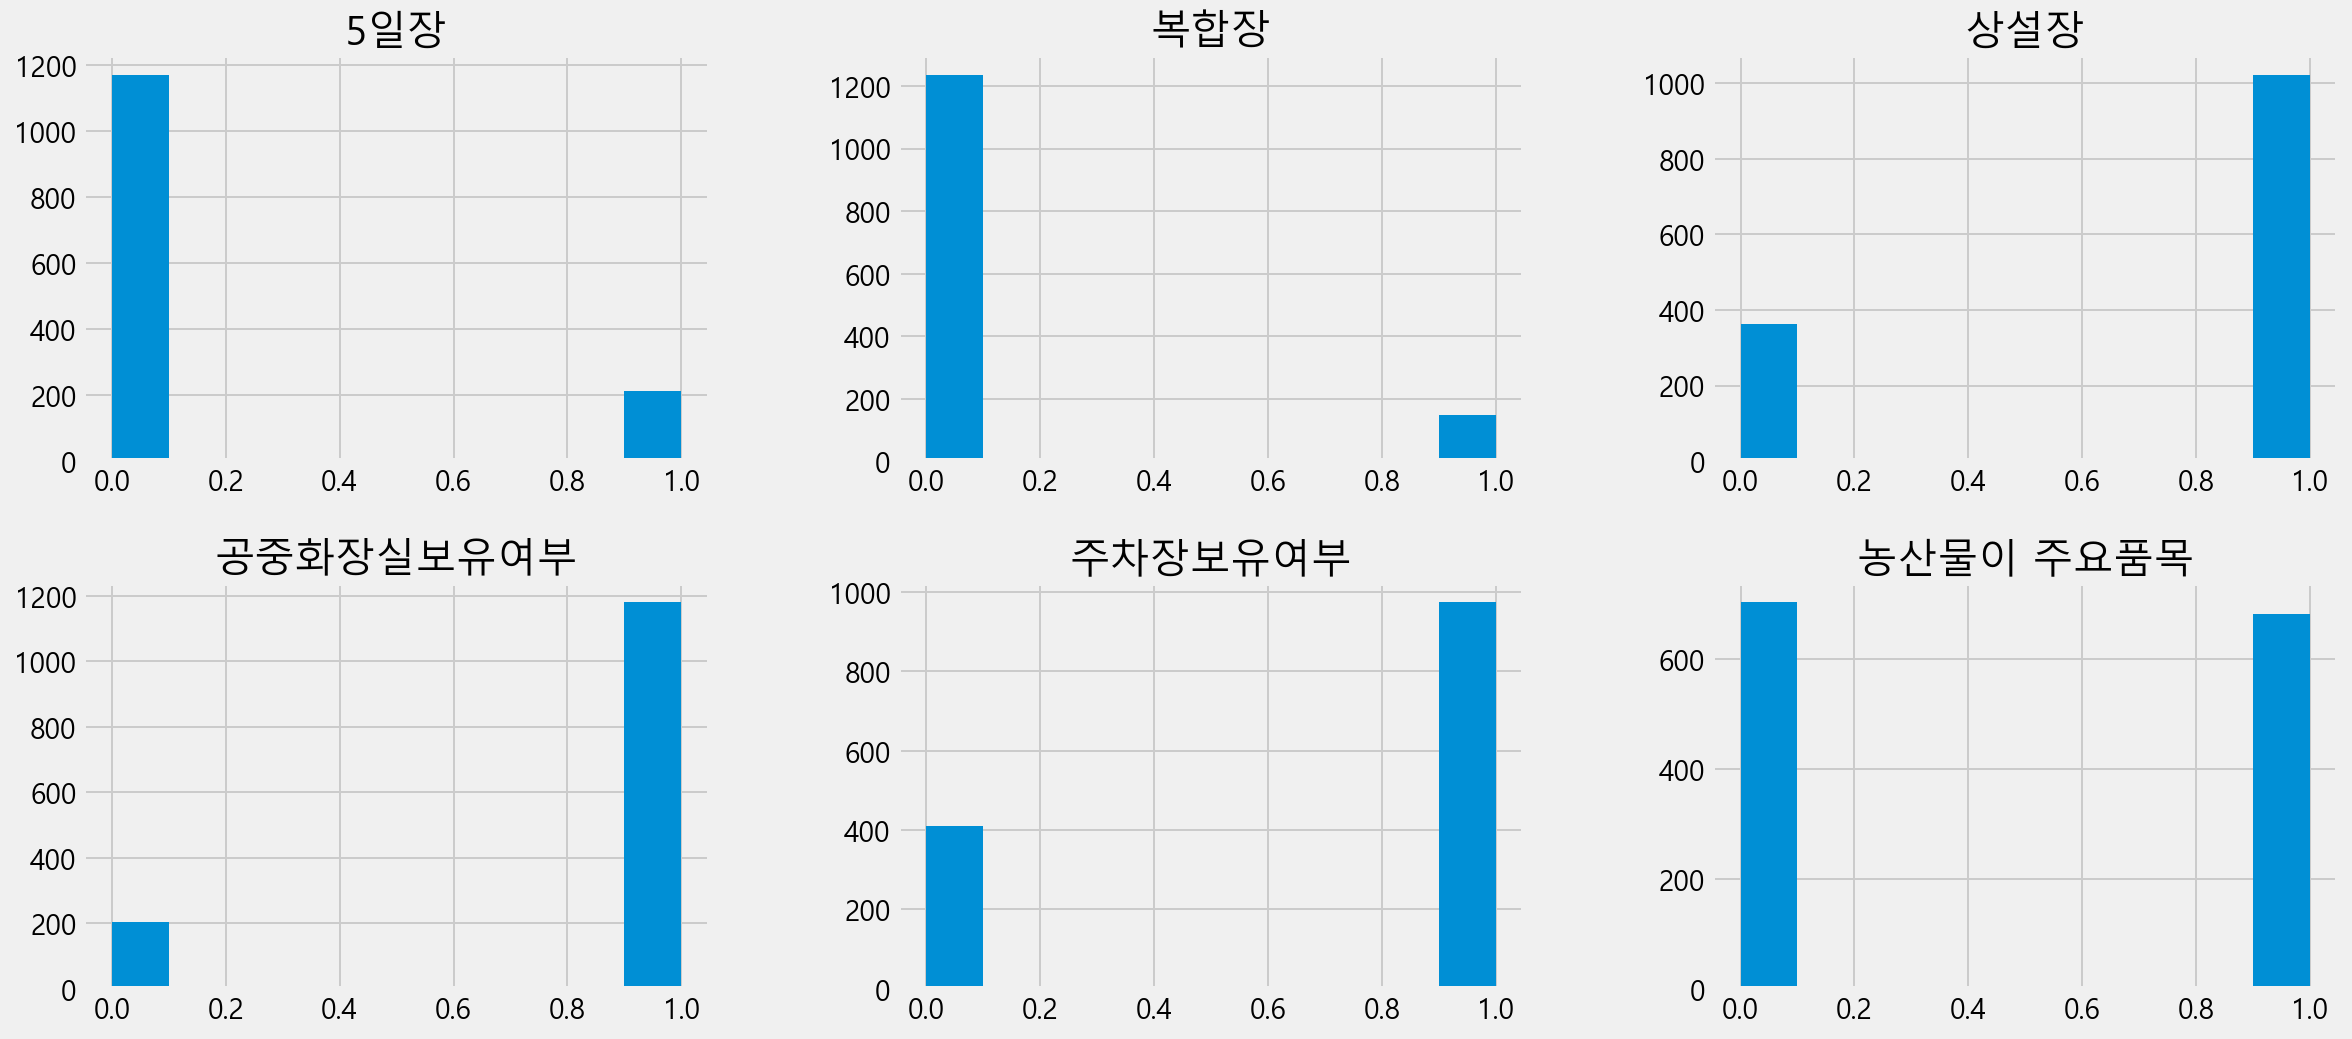

In [62]:
# 명목형 변수
categorical_variable = ['5일장', '복합장', '상설장', '공중화장실보유여부', '주차장보유여부', '농산물이 주요품목']
nrows, ncols = 2, 3
num_of_cv = len(categorical_variable)

fig,ax=plt.subplots(nrows=nrows, ncols=ncols,figsize=(18,8))
row = -1
for i, cv in enumerate(categorical_variable) :
    col = i % ncols
    if col == 0 :
        row += 1
    df[[cv]].hist(ax = ax[row, col])

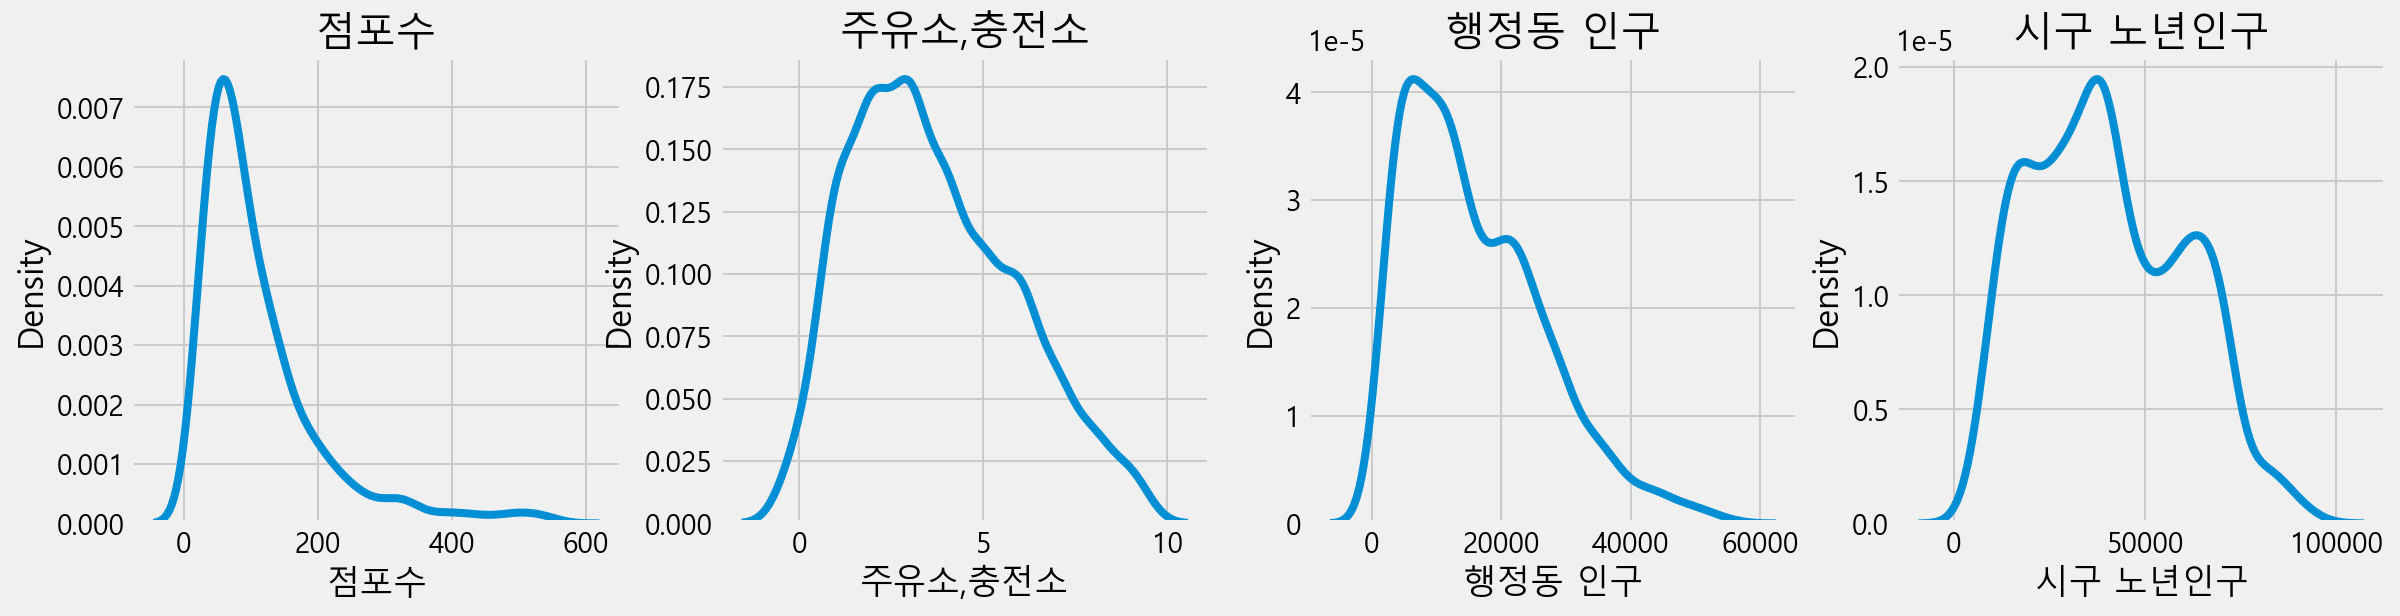

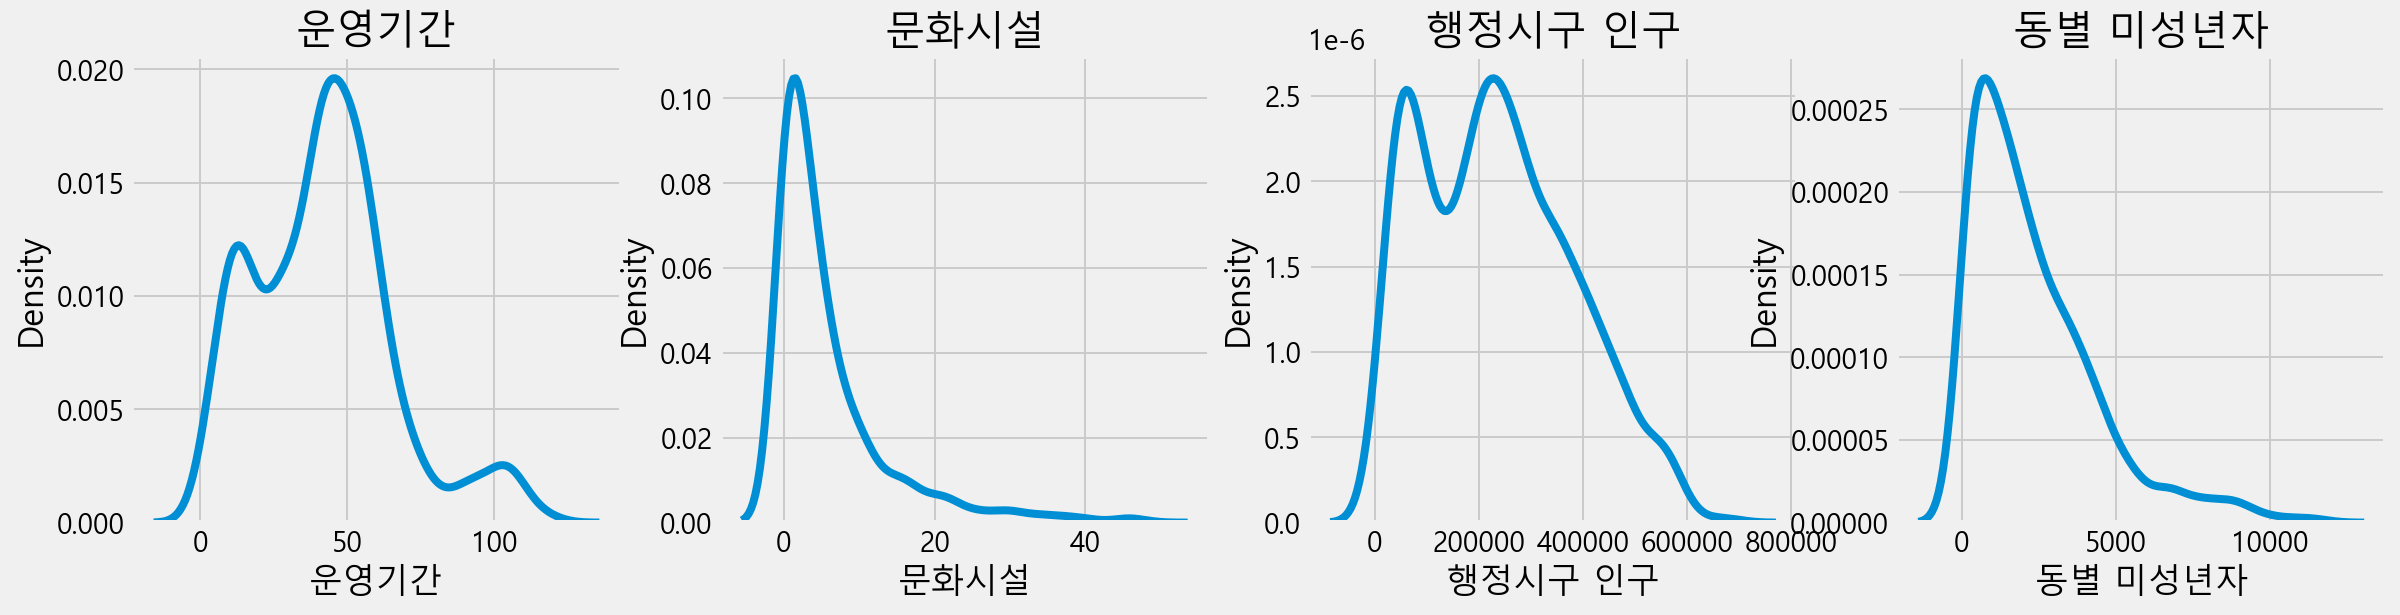

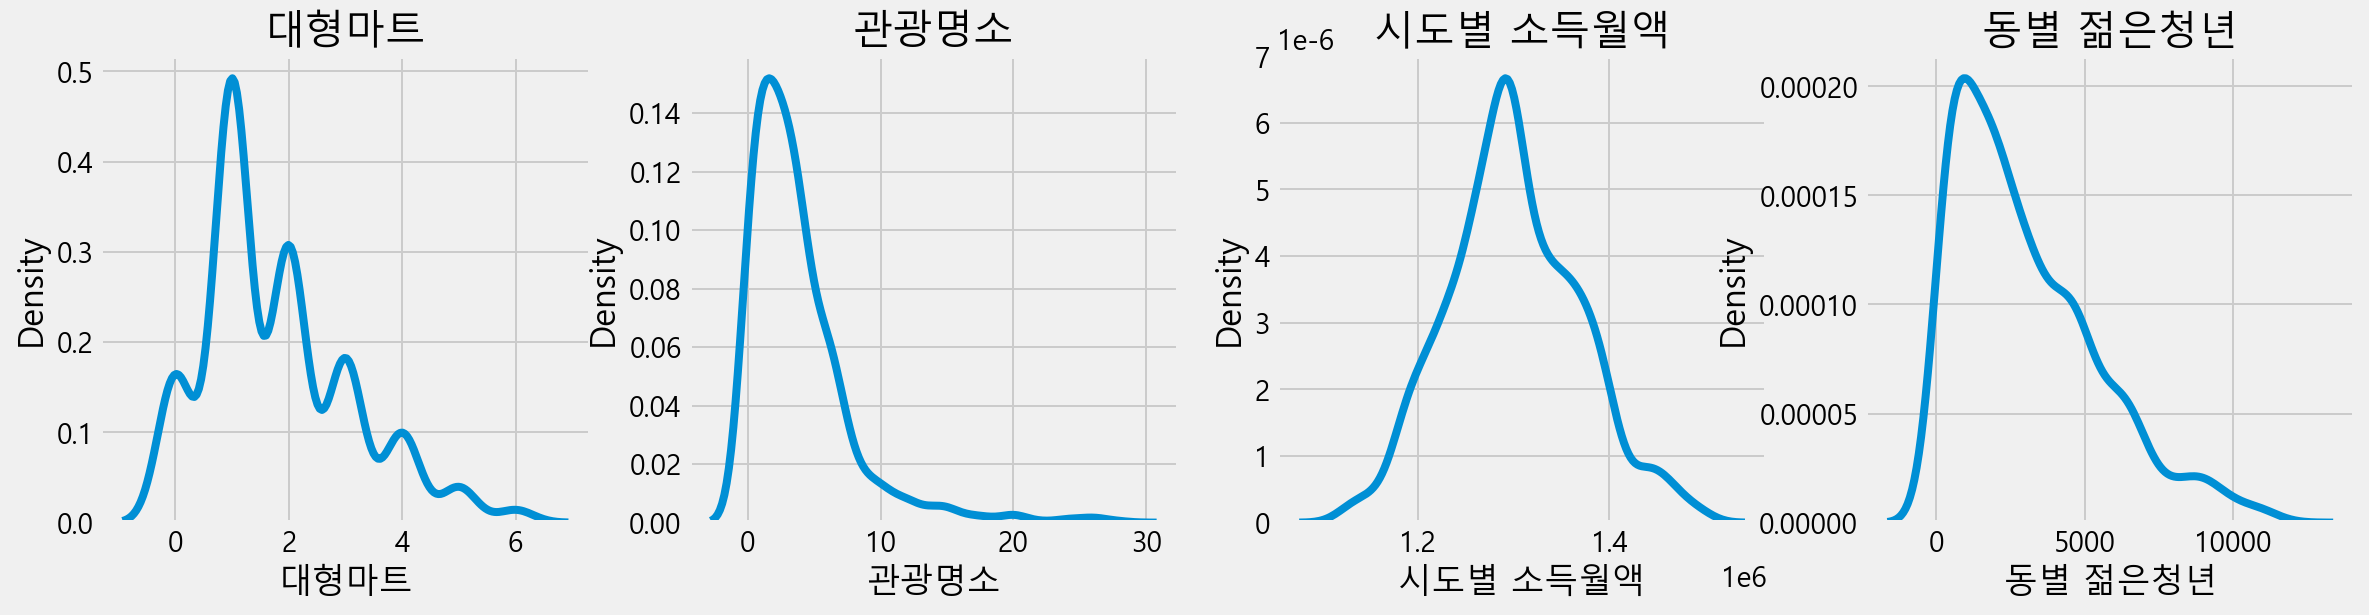

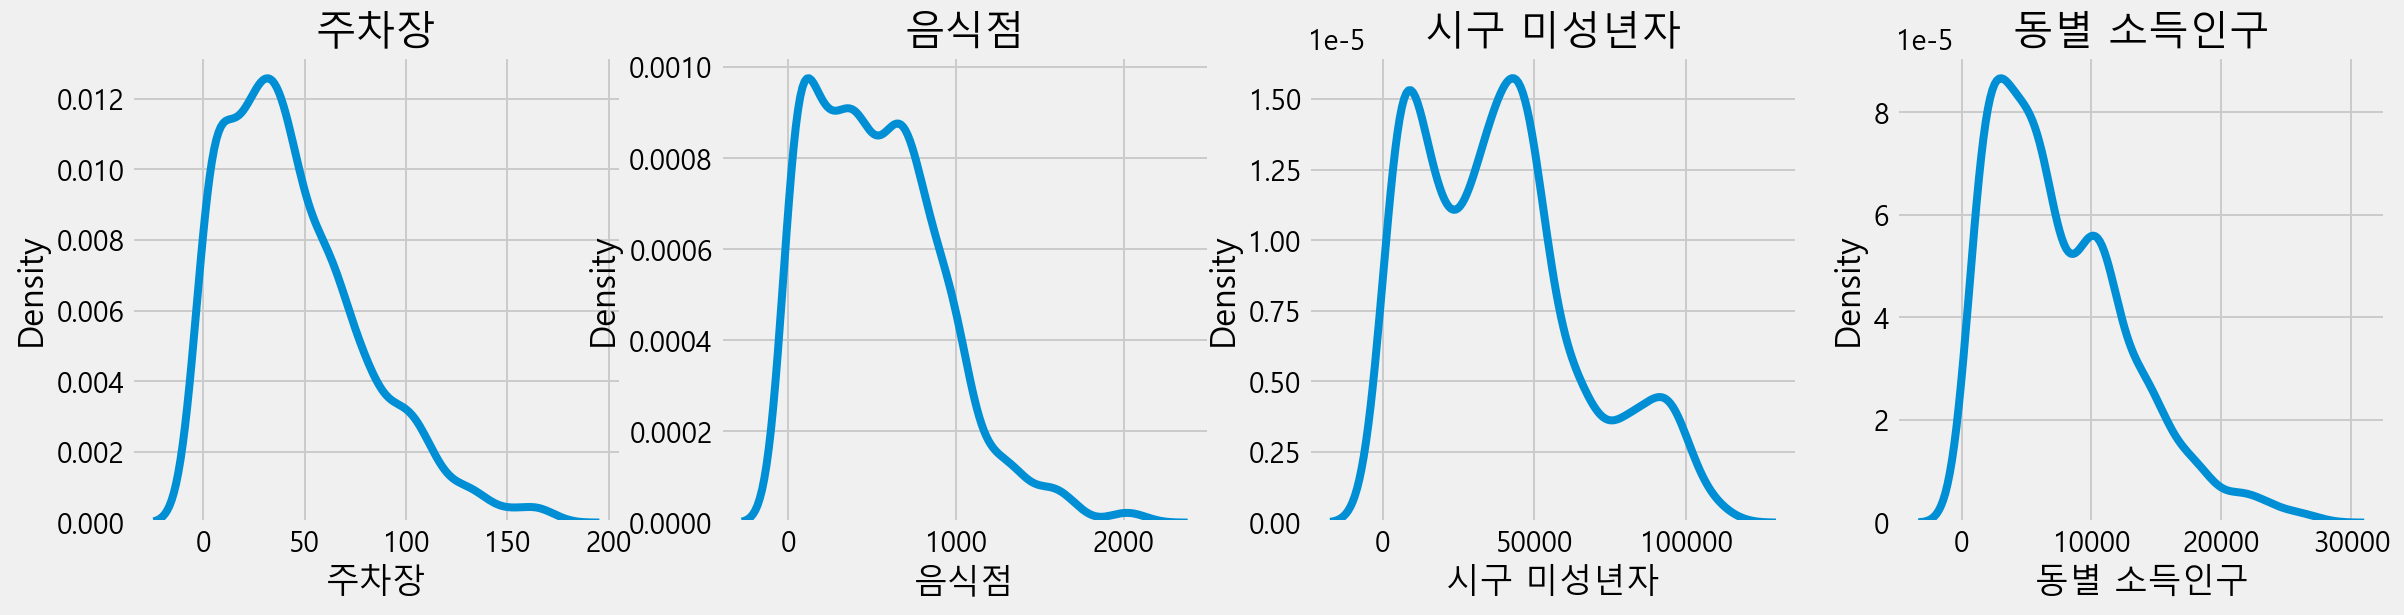

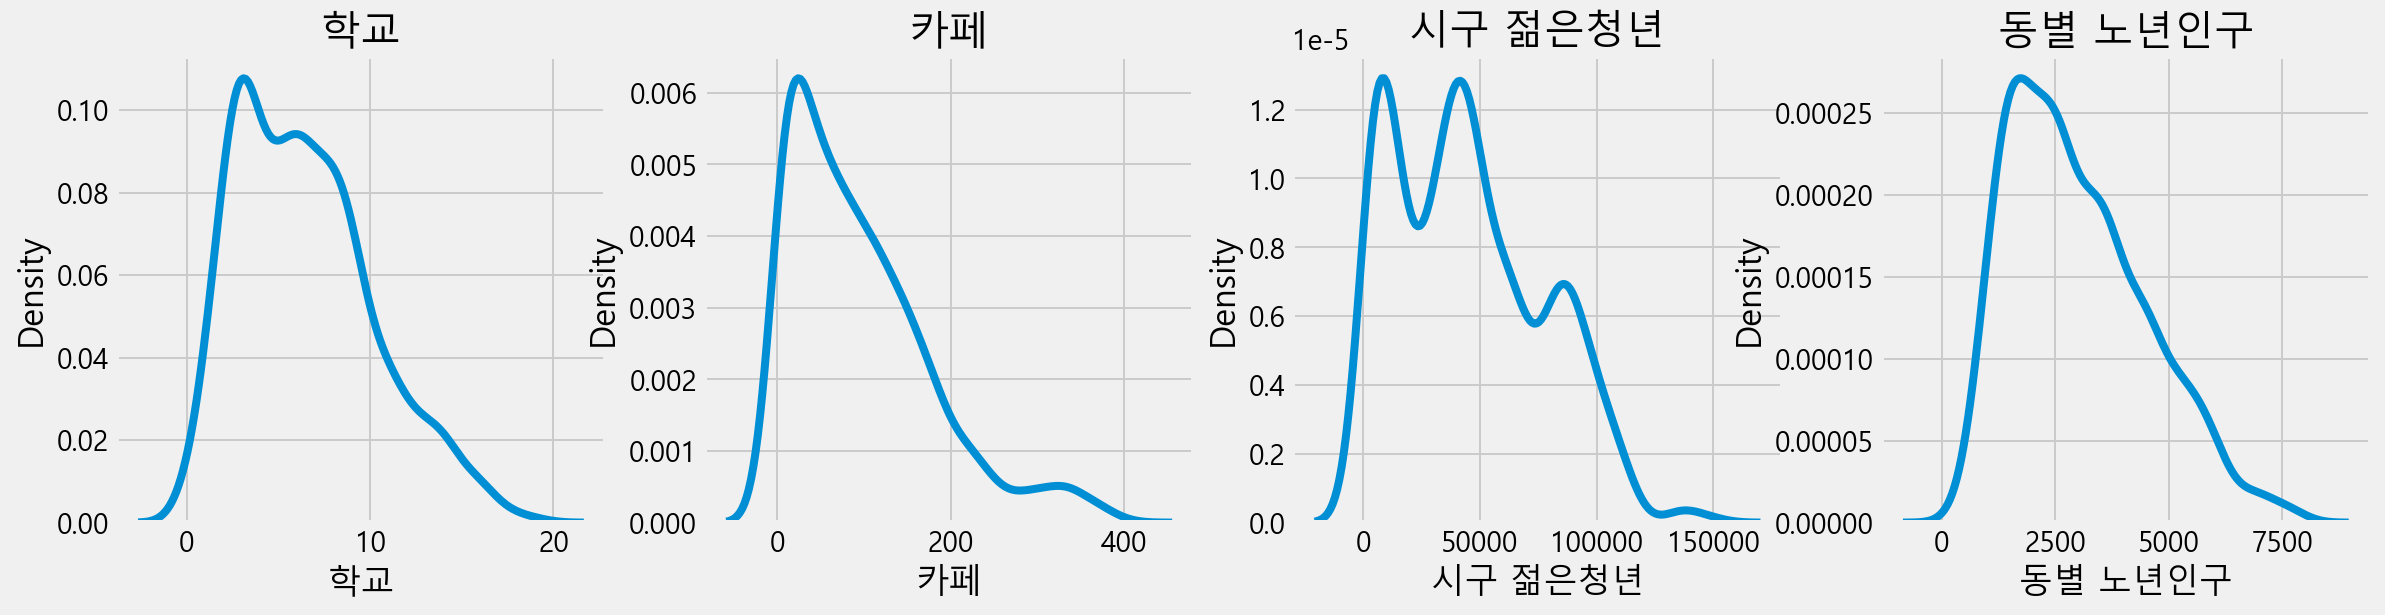

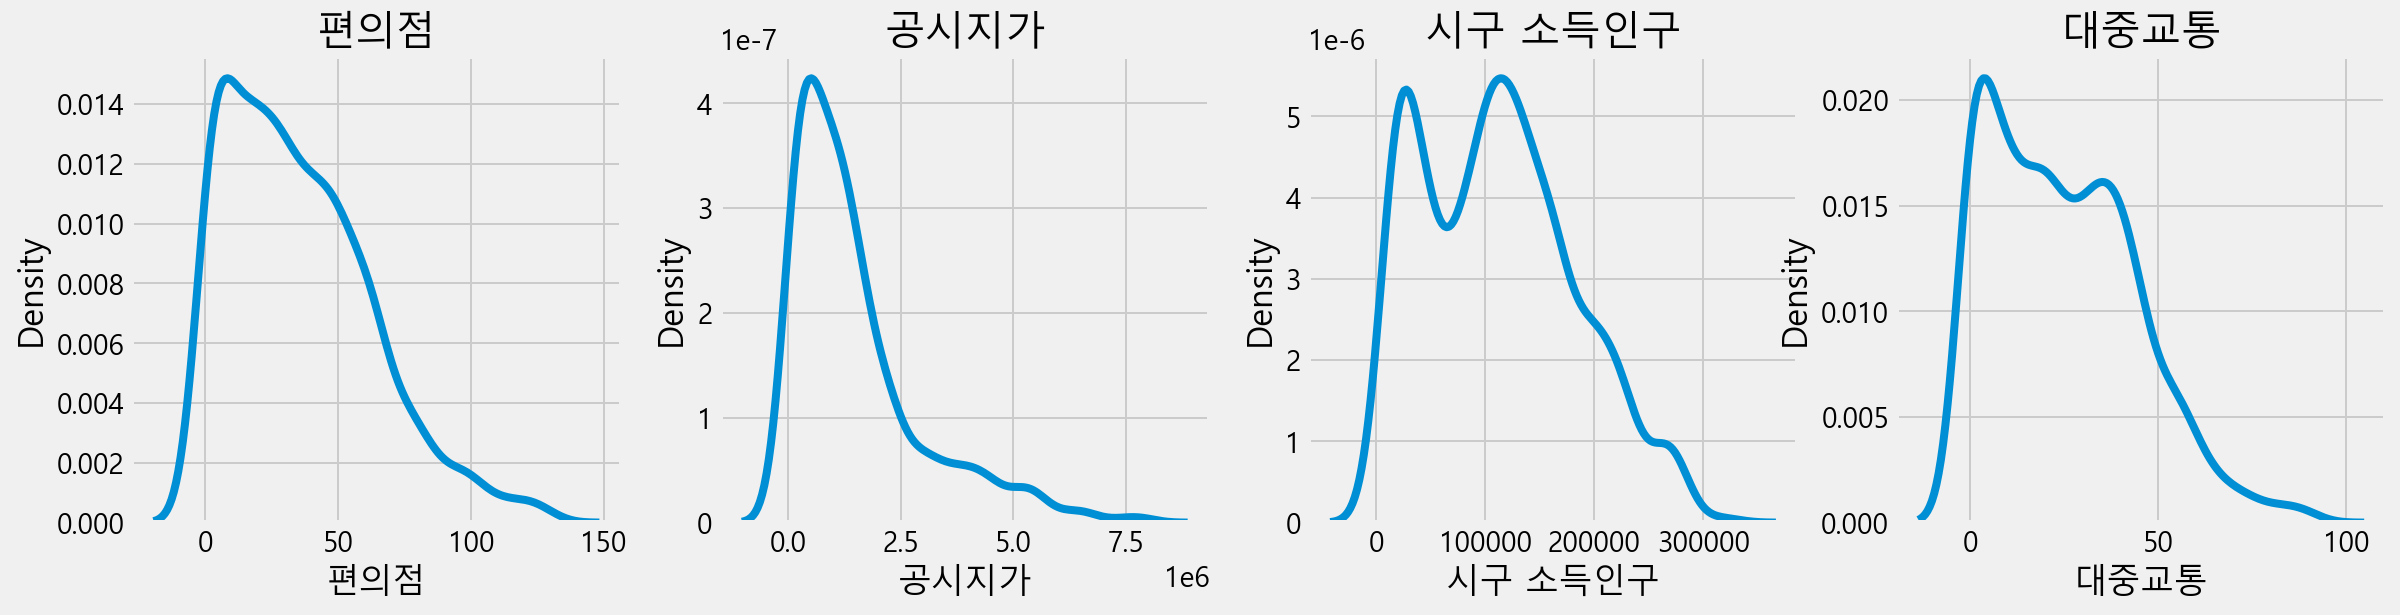

In [63]:
# 연속형 변수
df_number = df.drop(categorical_variable, axis = 1)
for row_num in range(6) :
    histplot(df_number, row_num, 4)

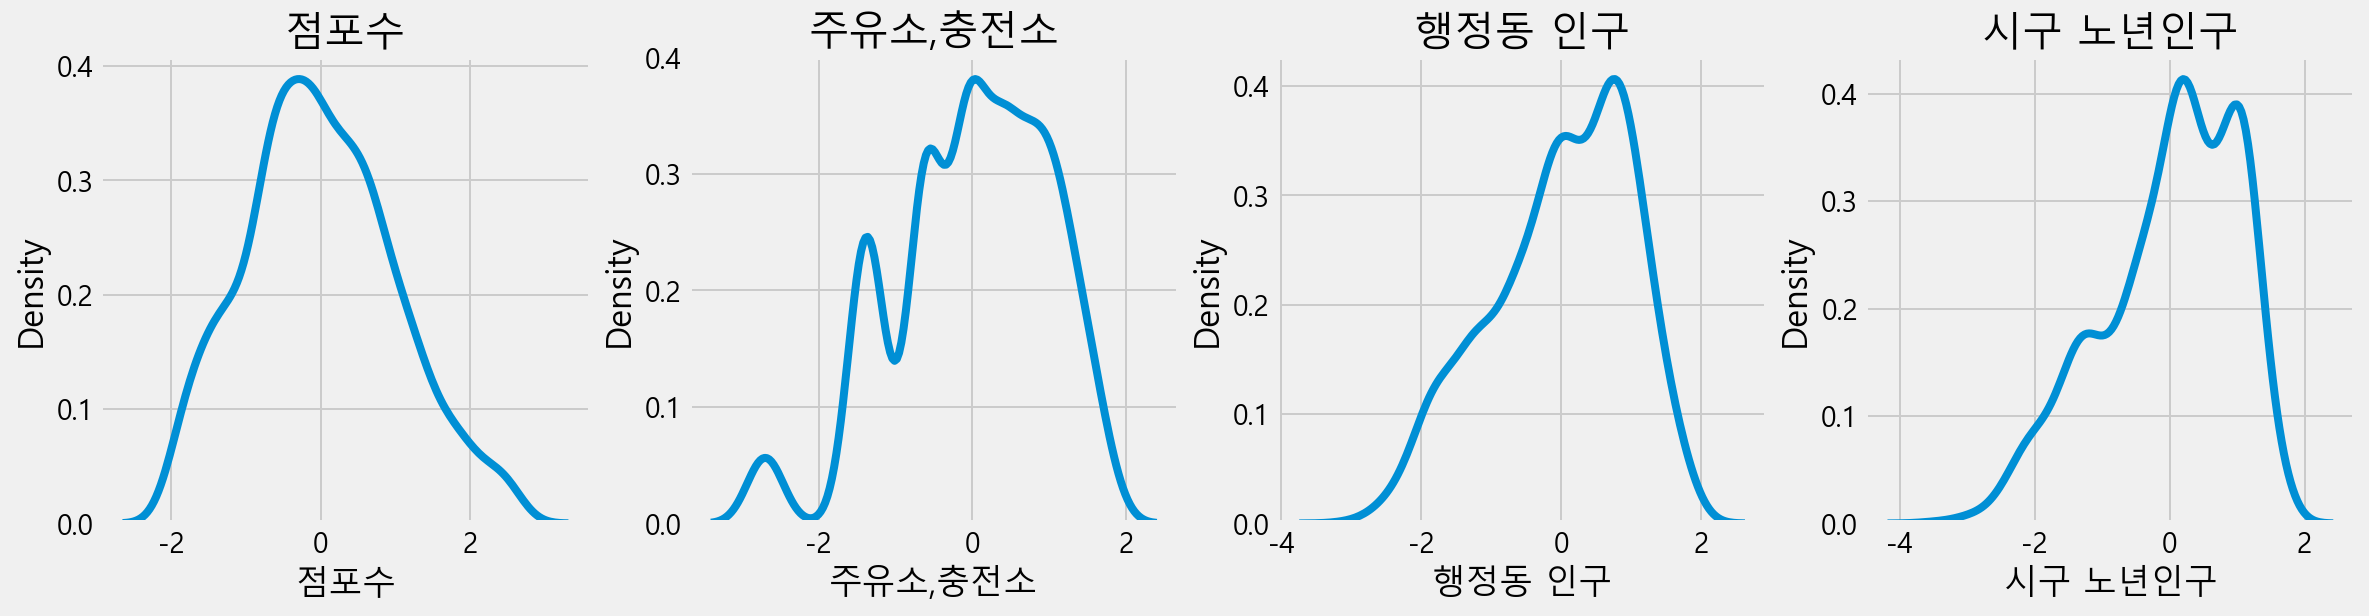

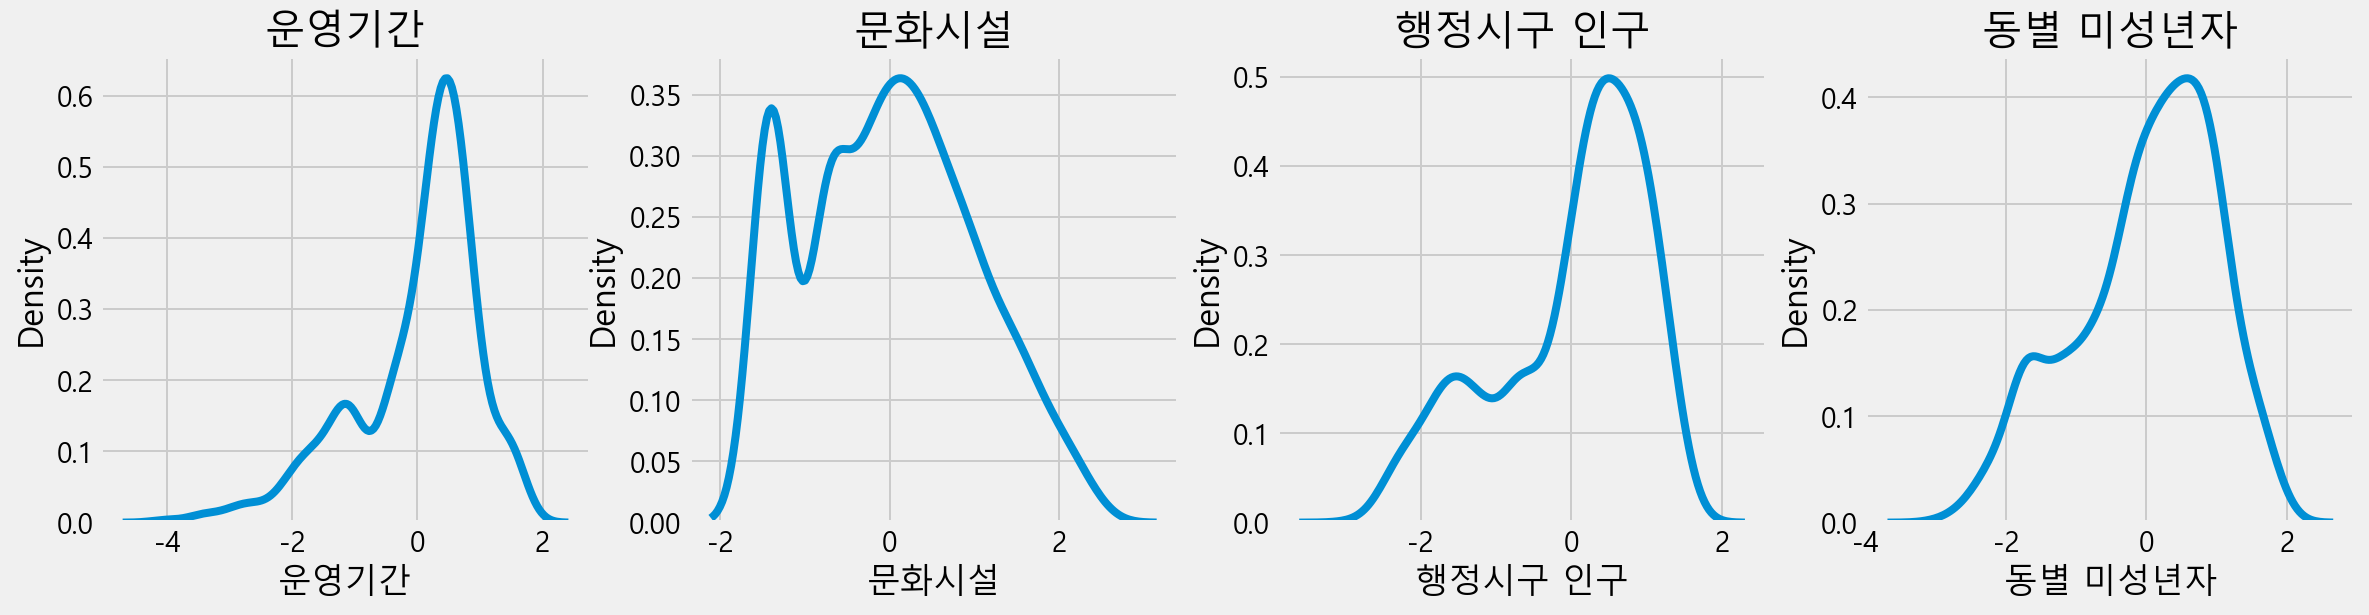

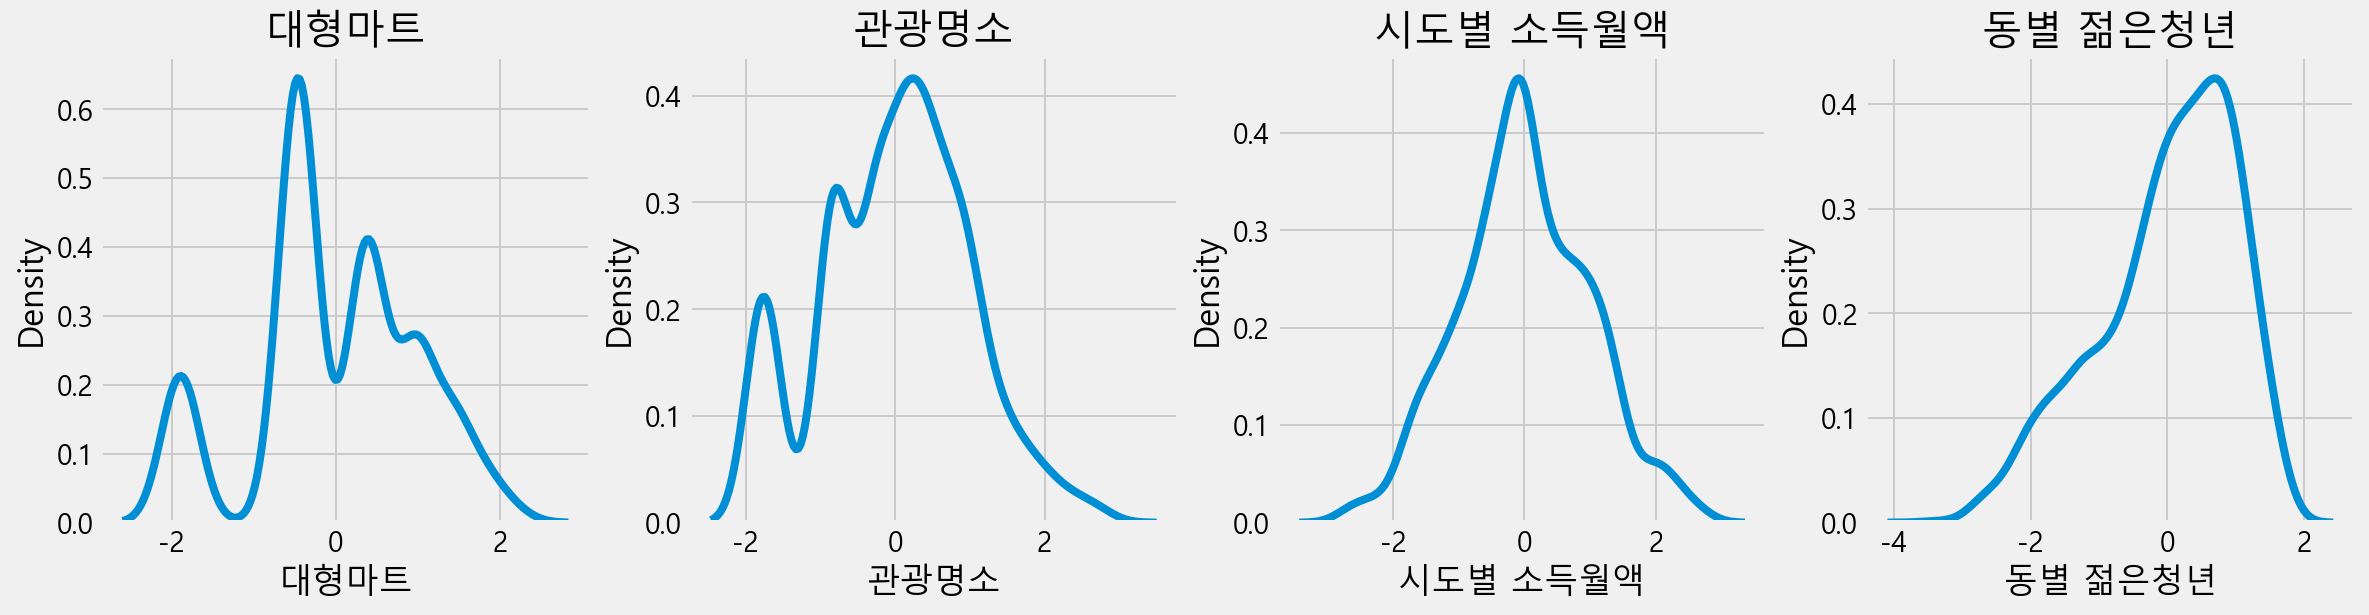

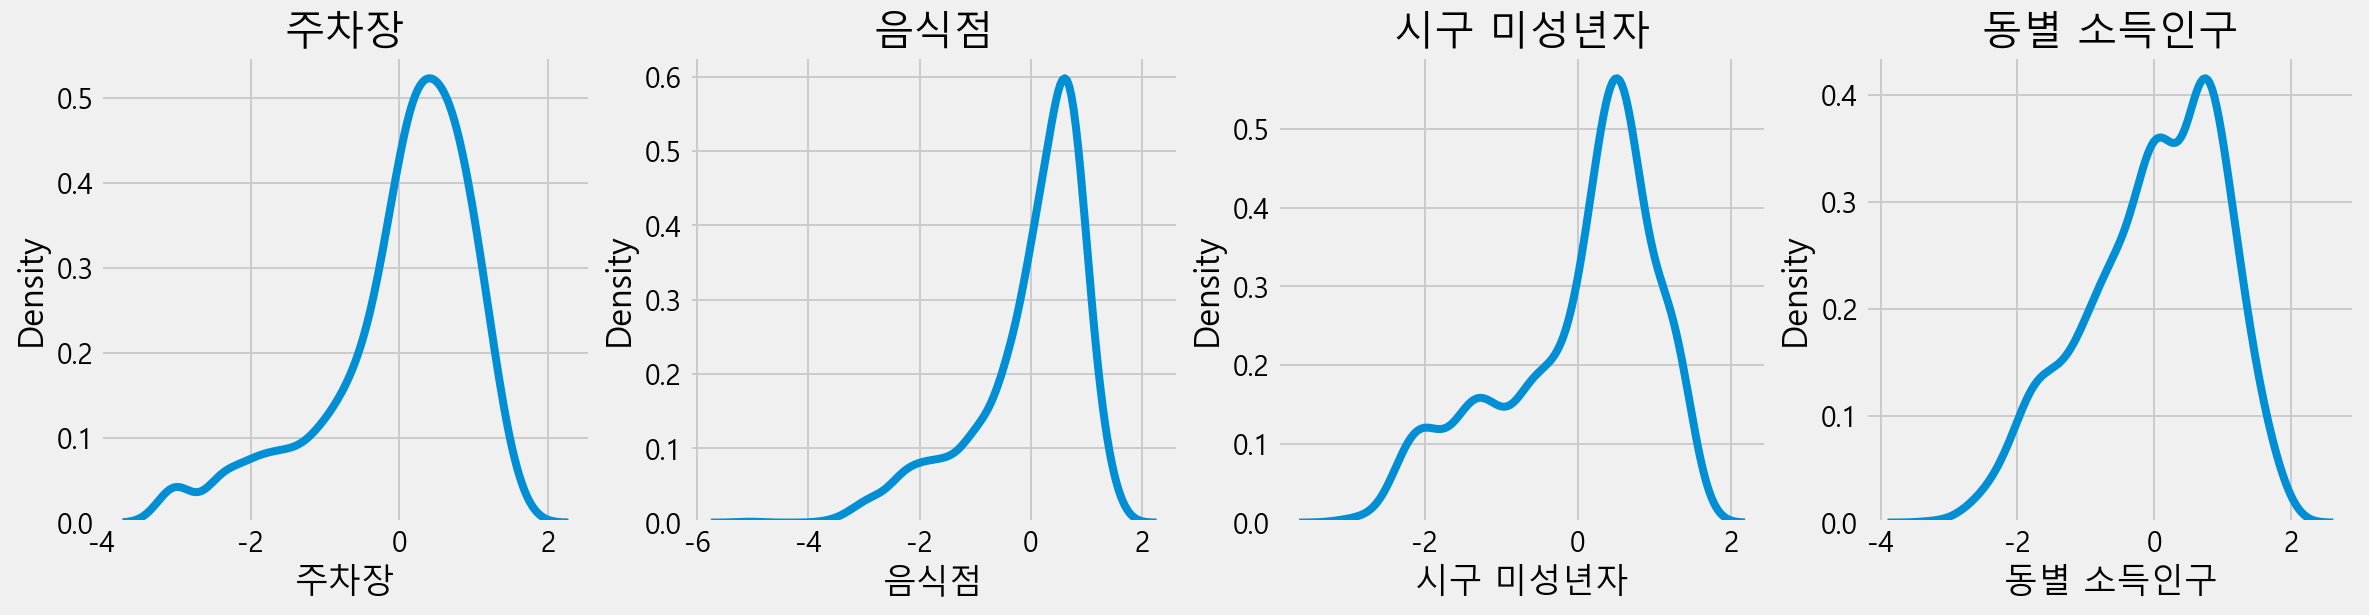

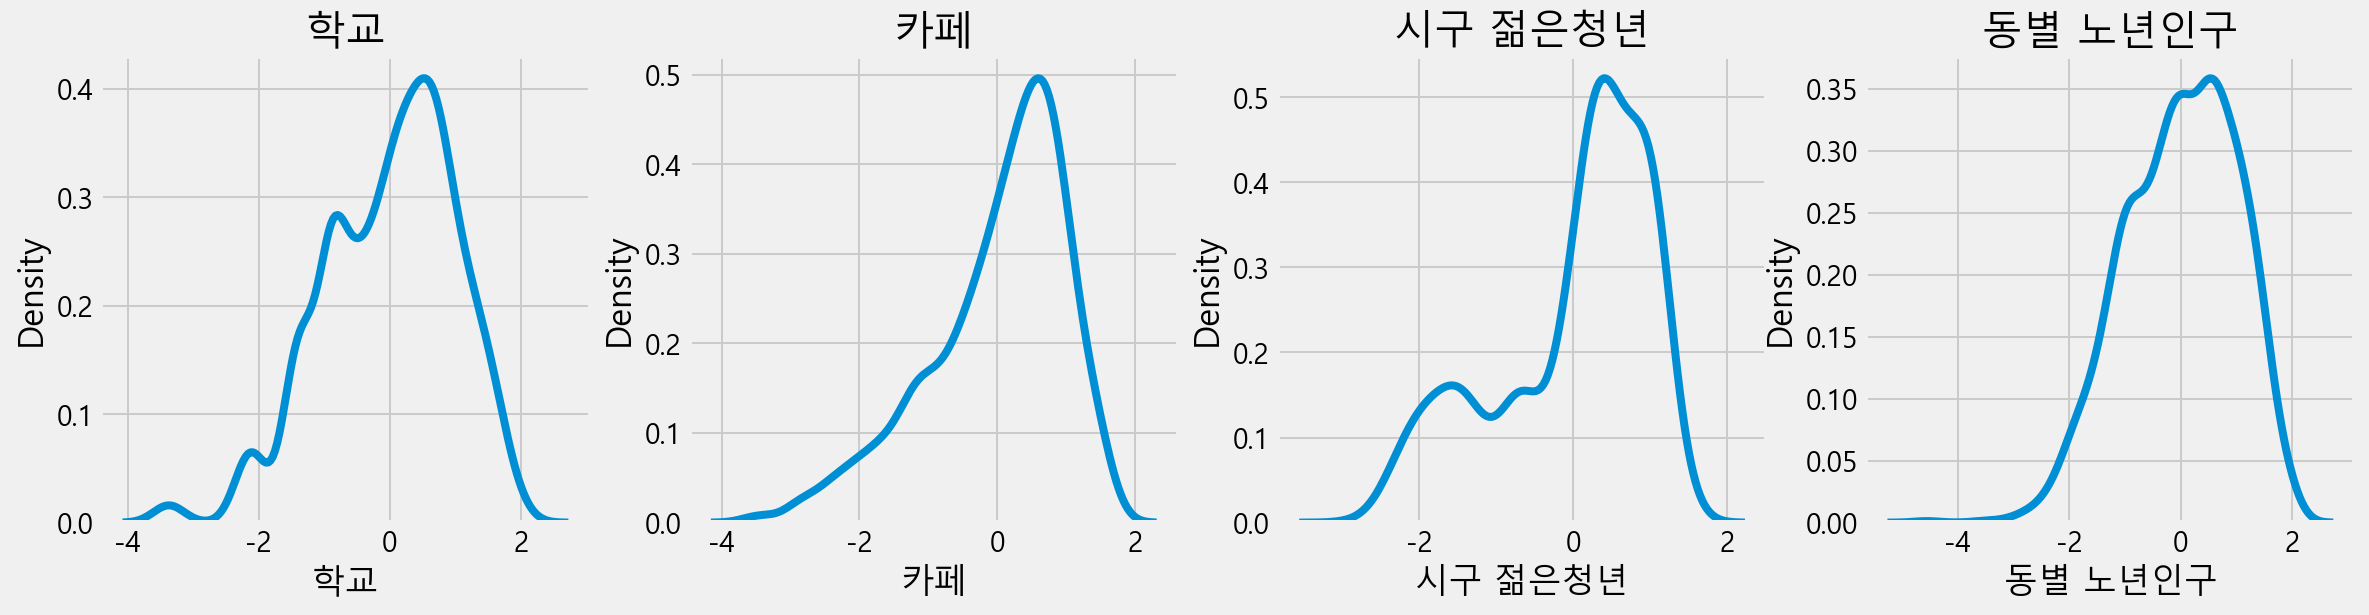

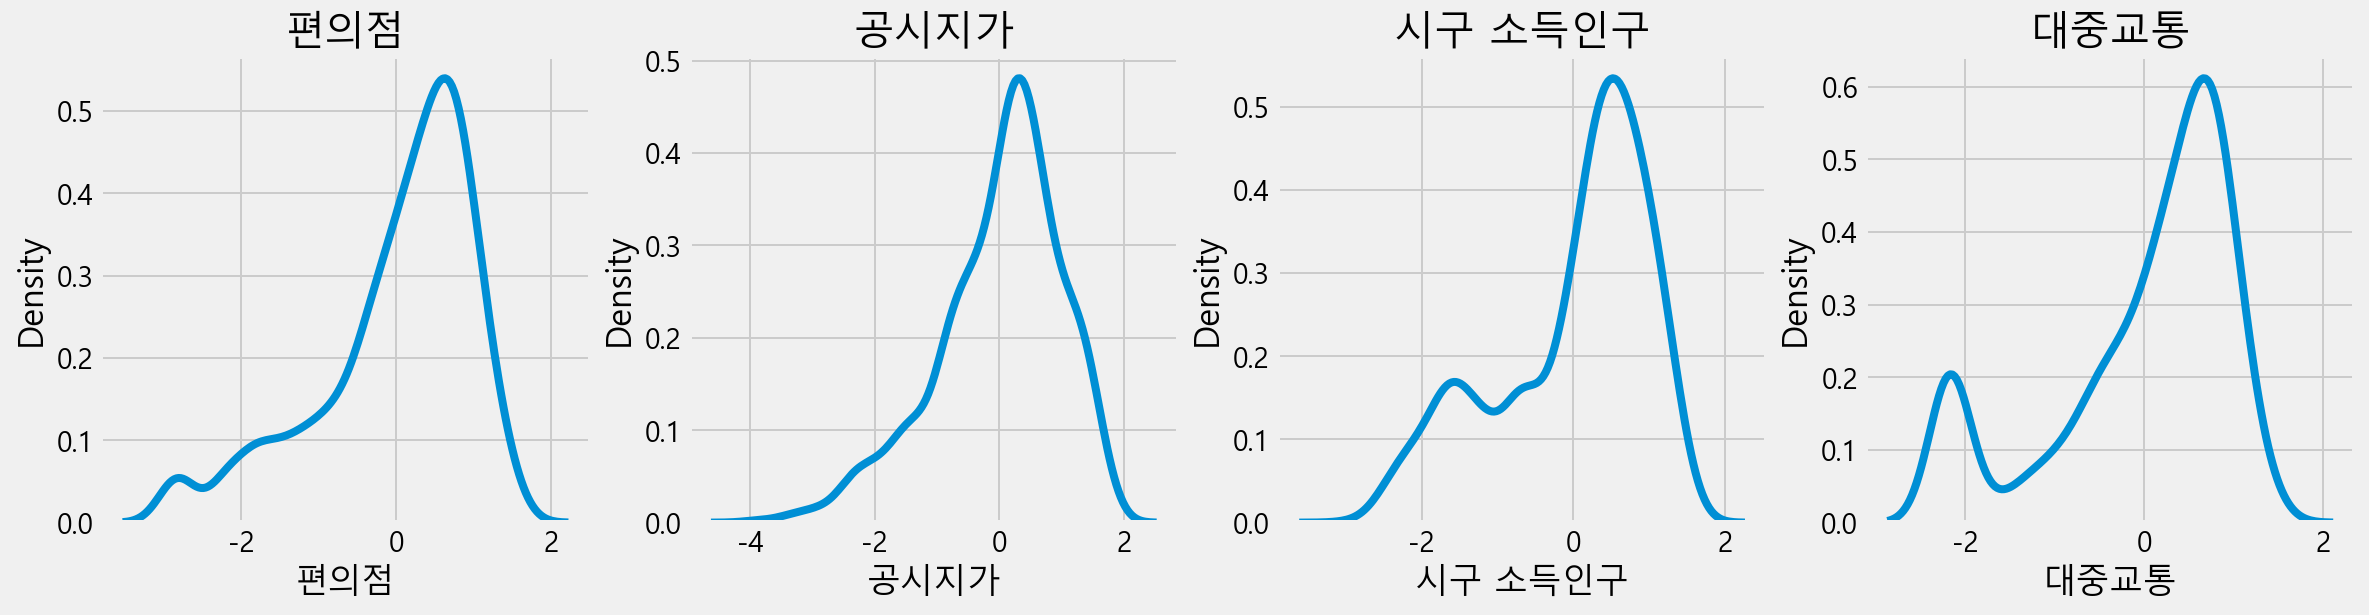

In [64]:
# StandardScaler와 logScale을 활용하여 정규화를 진행한다.
scaled_data = StandardScaler().fit_transform(np.log1p(df_number))
data_scale_log=pd.DataFrame(data=scaled_data, columns=df_number.columns)

for row_num in range(6) :
    histplot(data_scale_log, row_num, 4)